---
#Άσκηση 1. Επιβλεπόμενη Μάθηση: Ταξινόμηση
---


#Στοιχεία Ομάδας
<u>Συνεργάτες</u>:

Δούλης Κωνσταντίνος 03116175

Καλογερόπουλος Ιωάννης 03116117

Κατσίκας-Μουρούτσος Γεώργιος 03116132

---

Αρχικά, ενημερώνουμε τις βιβλιοθήκες που θα χρησιμοποιηθούν (έχει προστεθεί στην αρχή του κελιού η magic command %%capture ώστε να μην εμφανίζονται στο stdouput οι πληροφορίες των εγκαταστάσεων, για να είναι πιο ευανάγνωστο):

In [1]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #--upgrade #upgrade pandas package
!pip install -U tensorflow
!pip install --upgrade imbalanced-learn

  Using cached numpy-1.19.4-cp36-cp36m-manylinux2010_x86_64.whl (14.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.1 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached numpy-1.18.5-cp36-cp36m-manylinux1_x86_64.whl (20.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import warnings 
warnings.filterwarnings('ignore')

#Mικρό Dataset: Japanese Credit Screening


In [2]:
from urllib.request import urlretrieve
import os
import zipfile

def download(url, file):
    if not os.path.isfile(file):
        urlretrieve(url,file)
        print("File downloaded")

download('http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', 'crx.data')

File downloaded


##Πληροφορίες dataset

Το dataset που εξετάζουμε παρέχει πληροφορίες σχετικά με άτομα στα οποία χορηγήθηκε ή όχι πίστωση από Ιαπωνική εταιρεία. Τα δεδομένα παράχθηκαν ύστερα από σχετικές ερωτήσεις στους πελάτες τις εταιρείας.

##Περιγραφή χαρακτηριστικών του dataset

To dataset διαθέτει <b>690 δείγματα</b>, με το καθένα από αυτά να διαθέτει <b>15 χαρακτηριστικά συν 1 που είναι η κλάση</b>.

Το κάθε δείγμα αντιστοιχεί σε μία γραμμή του αρχείου, ενώ η κάθε στήλη σε ένα χαρακτηριστικό του. <b>Η τελευταία στήλη δηλώνει την κλάση που ανήκει το δείγμα</b>. Συγκεκριμένα, το σύμβολο <b>"+"</b> δηλώνει ότι η πίστωση <b>εγκρίθηκε</b>, ενώ το σύμβολο <b>"-"</b> δηλώνει ότι <b>δεν εγκρίθηκε</b>.
Επομένως, η δομή του αρχείου είναι κατάλληλη για να ξεκινήσουμε την προεπεξεργασία του dataset.

Για λόγους απορήτου τα attribute names και values έχουν αντικατασταθεί με τυχαία σύμβολα, που δεν παρέχουν κάποια σχετική πληροφορία σχετικά με το τι περιγράφουν.

Το είδος των χαρακτηριστικών φαίνεται παρακάτω:

| Attribute | Type of Data                                 | Description    |
|-----------|----------------------------------------------|----------------|
| A1        | b, a.                                        | Male           |
| A2        | continuous.                                  | Age            |
| A3        | continuous.                                  | Debt           |
| A4        | u, y, l, t.                                  | Married        |
| A5        | g, p, gg.                                    | BankCustomer   |
| A6        | c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff. | EducationLevel |
| A7        | v, h, bb, j, n, z, dd, ff, o.                | Ethnicity      |
| A8        | continuous.                                  | YearsEmployed  |
| A9        | t, f.                                        | PriorDefault   |
| A10       | t, f.                                        | Employed       |
| A11       | continuous.                                  | CreditScore    |
| A12       | t, f.                                        | DriversLicense |
| A13       | g, p, s.                                     | Citizen        |
| A14       | continuous.                                  | ZipCode        |
| A15       | continuous.                                  | Income         |
| A16       | +,-                                          | Approved (CLASS ATTRIBUTE)       |



* Τα χαρακτηριστικά που έχουν continuous τιμές αποτελουν <b>διατεταγμένα </b>χαρακτηριστικά, ενώ αυτά που έχουν διακριτές τιμές, δηλαδή σύμβολα, <b>μη διατεταγμένα</b>.

* Στο dataset <b>δεν</b> υπάρχουν επικεφαλίδες, καθώς ούτε και αρίθμηση γραμμών.

* Οι ετικέτες και οι σημασίες τους είναι:
    * "+": Εγκρίθηκε η πίστωση
    * "-": Απορρίφθηκε η πίστωση

    Οι ετικέτες αυτές βρίσκονται στην τελευταία στήλη, ενώ οι τιμές τους θα πρέπει να μετατραπούν όπως φαίνεται παρακάτω:
    * "+" -> 1
    * "-" -> 0

* <b>Υπάρχουν απουσιάζουσες τιμές</b>. Συγκεκριμένα, 37 δείγματα (5%) του συνολικού αριθμού δειγμάτων παρουσιάζουν μία ή παραπάνω απώλειες δεδομένων. 

Όλα τα παραπάνω φαίνονται παρακάτω:

##Προεπεξεργασία των δεδομένων
Aρχικά διαβάζουμε το αρχείο <b>crx.data</b>.

In [3]:
import pandas as pd

df = pd.read_csv("crx.data", header=None)
# print the five first samples
print(df[:5])
print(df.shape)

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +
(690, 16)


###Αντιστοίχιση κλάσεων
Παρατηρούμε, όπως ειπώθηκε και παραπάνω, ότι οι κλάσεις δηλώνονται στην τελευταία στήλη με τα σύμβολα +/-. 

Μετατρέπουμε τα "+" σε 1 και τα "-" σε 0:

In [4]:
# create mapper for each symbol
class_mapper = {"+": 1, "-": 0}
# since these symbols occur only on the last column we dont specify the column
df = df.replace(class_mapper)
print(df[:5])

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14  15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0   1
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560   1
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824   1
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3   1
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0   1


###Εντοπισμός απουσιάζουσων τιμών χαρακτηριστικών

Στη συνέχεια, θα εντοπίσουμε τις απουσιάζουσες τιμές. Αυτές δηλώνονται στο dataset με τον χαρακτήρα "?".

In [5]:
import numpy as np
from sklearn.impute import SimpleImputer

# replace "?" with np.NaN
df.replace('?',np.NaN,inplace=True)

# calculate the number of samples with at least one missing attribute
# df.isna() is the mask of df where each element is True if is NaN
# s is the length of the list of samples that have at least one True(NaN)
num_of_incomplete_samples = len([i for i in np.array(df.isna()) if True in i])

print("The samples of the dataset that have at least one missing attribute are ", num_of_incomplete_samples)
print("Which means that the ", num_of_incomplete_samples*100/df.shape[0], "% of the samples have missing values.", sep="")

The samples of the dataset that have at least one missing attribute are  37
Which means that the 5.36231884057971% of the samples have missing values.


Από τα παραπάνω βλέπουμε ότι αν θέλαμε να αγνοήσουμε τα δείγματα που έχουν missing values θα έπρεπε να "πετάξουμε" το 5% των δειγμάτων, αριθμός που <b>θα επηρέαζε αρνητικά τα αποτελέσματα</b>.

Προκειμένου να εξετάσουμε αν οι περισσότερες τιμές που λείπουν προέρχονται απο συγκεκριμένα (λίγα) χαρακτηριστικά (και αν αυτά έχουν ίσως και μηδενική διακύμανση, δηλαδή  χαρακτηριστικά με σταθερές τιμές), οπότε θα μπορούσαμε να τα αγνοήσουμε, εκτελούμε:

In [6]:
# the list of the number of missing values for each attribute occurs by 
# summing the elements of the inverse of df, without df's last column.
# df's last column is the class attribute and it is alwasy present.
incomplete_attrs = [sum(i) for i in np.array(df.isna())[:,:df.shape[1]-1].T]
print("For each attribute of the dataset, the number of the missing values is")
print(incomplete_attrs)
# print(sum(incomplete_attrs))

For each attribute of the dataset, the number of the missing values is
[12, 12, 0, 6, 6, 9, 9, 0, 0, 0, 0, 0, 0, 13, 0]


Βλέπουμε, επομένως, ότι από τα 690 δείγματα το πολύ σε 13 από αυτά ένα χαρακτηριστικό δεν έχει τιμές. Επομένως, δεν έχει νόημα να αγνοήσουμε το χαρακτηριστικό αυτό, ακόμα και αν είναι αυτό με τις περισσότερες ελλείψεις, αφού αυτές είναι πολύ λίγες και θα χάναμε πολύ πληροφορία.

Τελικά η πιο συμφέρουσα λύση είναι να αντικαταστήσουμε τα NaN με τιμές που προκύπτουν με βάση τις τιμές των χαρακτηριστικών σε προηγούμενα δείγματα. <u>Συγκεκριμένα, αντικαθιστούμε τα NaN με την τιμή του χαρακτηριστικού που εμφανίζεται πιο συχνά</u>.

Την αντικατάσταση των απουσιάζουσων τιμών θα τη χειρίζεται το πρώτο κομμάτι προεπεξεργασίας του Pipeline, που θα οριστεί στη συνέχεια και θα πρόκειται για έναν μετασχηματιστή Imputer.

Οι κλάσεις βρίσκονται στην τελευταία στήλη του συνόλου δεδομένων. Οπότε για να βρούμε το πλήθος τους και τα ποσοστά δειγμάτων τους επί του συνόλου:

In [7]:
num_of_rows = df.shape[0]
num_of_attrs = df.shape[1] - 1 #remove one element because of the class attribute

# get labesl and features
labels_df = df.iloc[:, [num_of_attrs]] # τα labels είναι στην τελευταία κολώνα
features_df = df.iloc[:, 0:num_of_attrs]  # τα features είναι όλες οι προηγούμενες κολώνες

labels = labels_df.values.reshape(num_of_rows,)
features = features_df.values
# convert to int
labels.astype(int)
labels = np.array(labels, dtype='int64')
# print(labels.shape)

# find how many of each class
bin_count = np.bincount(labels)
print ("frequencies:", bin_count)
print("The percentage of 0's in data: ", bin_count[0]*100/sum(bin_count), "%.")
print("The percentage of 1's in data: ", bin_count[1]*100/sum(bin_count), "%.")

frequencies: [383 307]
The percentage of 0's in data:  55.507246376811594 %.
The percentage of 1's in data:  44.492753623188406 %.


Καταλήγουμε, λοιπόν, ότι τα ποσοστά είναι περίπου 55.5% για την κλάση 0 και 44.5% για την κλάση 1. Επομένως, το dataset είναι <b>ισορροπημένο</b>.

In [8]:
# print(labels[:5])
print(features.shape)

(690, 15)


###Εντοπισμός κατηγορικών χαρακτηριστικών
Το dataset περιλαμβάνει εκτός από χαρακτηριστικά με συνεχείς αριθμητικές τιμές και κατηγορικά χαρακτηριστικά. Από τις πληροφορίες που έχουμε για το dataset, τα χαρακτηριστικά που είναι κατηγορικά είναι αυτά που αντιστοιχούν στις στήλες:

    0,3,4,5,6,8,9,11,12

Ο χειρισμός των κατηγορικών συμβόλων θα γίνει μετά το χειρισμό των απουσιάζουσων τιμών και πριν το Cross Validation.

##Διαχωρισμός του dataset
Διαχωρίζουμε το dataset σε train και test set, χρησιμοποιώντας το 80% των δεδομένων για το training και το 20% για το testing:

In [9]:
from sklearn.model_selection import train_test_split


train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=78)

In [10]:
train_pd = pd.DataFrame(data=train[:,:],    # values
                 index=train[:,0])    # 1st column as index
                  
test_pd = pd.DataFrame(data=test[:,:],    # values
                 index=test[:,0])    # 1st column as index

In [11]:
print(train.shape)
print(train_pd.shape)

print(test.shape)
print(test_pd.shape)

(552, 15)
(552, 15)
(138, 15)
(138, 15)


In [12]:
from collections import defaultdict
# just for checking...
print(train.shape)
print(test.shape)
check = defaultdict(int)
for i in range(0,len(train_labels)):
    check['pos_train'] += train_labels[i] == 1
    check['neg_train'] += train_labels[i] == 0
    

# for i in range(0,len(test_labels)):
#     check['pos_test'] += test_labels[i] == 1
#     check['neg_test'] += test_labels[i] == 0
    
# print(check)

(552, 15)
(138, 15)


##Κατασκευή Pipeline

###Χειρισμός απουσιάζουσων τιμών
Όπως καταλήξαμε θα χρησιμοποιηθεί ο μετασχηματιστής Imputer, για τον χειρισμό των απουσιάζουσων τιμών, θέτοντας σε αυτές την πιο συχνή τιμή του χαρακτηριστικού για τα κατηγορικά χαρακτηριστικά και τη μέση τιμή του χαρακτηριστικού για τα αριθμητικά.

Αυτό το επιτυγχάνουμε χωρίζοντας το train και test σε δύο πίνακες με τα αριθμηρικά και τα κατηγορικά χαρακτηριστικά αντίστοιχα, αντικαθιστώντας με την κατάλληλη τιμή και στη συνέχεια ξαναενώνοντας τους δύο πίνακες, θέτοντας τη σωστή σειρά στις στήλες.

In [13]:
# create imputer that will replace NaN with the most frequent value
imp_num=SimpleImputer(missing_values=np.NaN,strategy="mean")
imp_cat=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")

# split train data to numerical and non-numerical
train_num = train_pd[[1,2,7,10,13,14]]
train_cat = train_pd[[0,3,4,5,6,8,9,11,12]]

# fit and transform train data by replacing NaN with the most frequent value of the attribute
# numerical
i_train_num=pd.DataFrame(imp_num.fit_transform(train_num))
i_train_num.columns=train_num.columns
i_train_num.index=train_num.index

# non-numerical
i_train_cat=pd.DataFrame(imp_cat.fit_transform(train_cat))
i_train_cat.columns=train_cat.columns
i_train_cat.index=train_cat.index

# concat the two tables
i_train = pd.concat([i_train_num, i_train_cat], axis=1, sort=False)
# set the right order of columns
i_train = i_train[train_pd.columns]

# transform the test data using the same model
test_num = test_pd[[1,2,7,10,13,14]]
test_cat = test_pd[[0,3,4,5,6,8,9,11,12]]

i_test_num = pd.DataFrame(imp_num.transform(test_num.values))
i_test_num.columns=test_num.columns
i_test_num.index=test_num.index
i_test_cat = pd.DataFrame(imp_cat.transform(test_cat.values))
i_test_cat.columns=test_cat.columns
i_test_cat.index=test_cat.index

# concat the two tables
i_test = pd.concat([i_test_num, i_test_cat], axis=1, sort=False)
# set the right order of columns
i_test = i_test[test_pd.columns]

In [14]:
print(train_pd.shape)
print(i_train.shape)

print(test_pd.shape)
print(i_test.shape)

(552, 15)
(552, 15)
(138, 15)
(138, 15)


###Χειρισμός κατηγορικών χαρακτηριστικών

Για τον χειρισμό των κατηγορικών χαρακτηριστικών θα μετατρέψουμε τα μη διατεταγμένα χαρακτηριστικά με m τιμές σε m binary χαρακτηριστικά από τα οποία μόνο ένα είναι ενεργό κάθε φορά. Τα μη διατεταγμένα χαρακτηριστικά είναι τα: 
    0,3,4,5,6,8,9,11,12
Επομένως εκτελούμε:

In [15]:
# οι κολόνες 0,3,4,5,6,8,9,11,12 έχουν κατηγορικές μεταβλητές. 
# Using "get_dummies" we convert to binary characteristics

# converting train data
dummies_train = pd.get_dummies(i_train, columns=[0,3,4,5,6,8,9,11,12])


# converting test data
# convert to dataframe 
mtdf = pd.DataFrame(i_test)
dummies_test = pd.get_dummies(mtdf, columns=[0,3,4,5,6,8,9,11,12])

Σε αυτό το σημείο θα πρέπει να έχουν δημιουργηθεί για κάθε τιμή των χαρακτηριστικών του συνόλου δεδομένων στο train dataset δυαδικά χαρακτηριστικά που δηλώνουν αν έχει ή όχι το δείγμα για το συγκεκριμένο χαρακτηριστικό αυτήν τιμή. Το ίδιο ισχύει και για το σύνολο δεδομένων στο test dataset. Ωστόσο, το δεύτερο είναι πολύ μικρότερο από το πρώτο και ανάλογα το πώς έγινε το split κάποιες τιμές για ορισμένα χαρακτηριστικά μπορεί να μην περιέχονται και στα 2 σύνολα, με αποτέλεσμα διαφορετικά σύνολα στηλών στα train και test. Για να αντιμετωπίσουμε αυτό το ζήτημα βρίσκουμε τις στήλες που εμφανίζονται μόνο στο ένα σύνολο δεδομένων και τις προσθέτουμε στο άλλο θέτοντας τιμή **0**. Αυτό το κάνουμε και για τα δύο σύνολα, αφού αν και λιγότερο πιθανό, μία τιμή ενός χαρακτηριστικού δύναται να περιέχεται στο test dataset και όχι στο train dataset. Ακολουθεί η υλοποίηση των παραπάνω:

In [16]:
add_to_test = set(dummies_train.columns.values) - set(dummies_test.columns.values)
for col in add_to_test:
    dummies_test[col] = 0
dummies_test = dummies_test[dummies_train.columns]
print(dummies_test.shape[1] == dummies_test.shape[1])

# MAYBE DO IT FOR TRAIN TO

True


Επομένως, με αυτόν τον τρόπο διασφαλίζουμε ότι τα δύο σύνολα έχουν <u>τα ίδια χαρακτηριστικά και με την ίδια σειρά</u>. 

Τέλος, μετατρέπουμε σε αριθμητικές τιμές:

In [17]:
# Μετατρέπουμε σε αριθμητικές τιμές (pd.to_numeric) και σε numpy array (.values)
final_train = dummies_train.apply(pd.to_numeric).values
print(final_train.shape)
# Μετατρέπουμε σε αριθμητικές τιμές (pd.to_numeric) και σε numpy array (.values)
final_test = dummies_test.apply(pd.to_numeric).values
print(final_test.shape)

(552, 46)
(138, 46)


Βλέπουμε, όπως αναμενόταν, ότι το πλήθος των χαρακτηριστικών φαίνεται έχει πλέον αυξηθεί.
Στην πραγματικότητα παραμένουν τα ίδια χαρακτηριστικά, ωστόσο για κάθε κατηγορικό χαρακτηριστικό Κ, δημιουργούμε το χαρακτηριστικό έχειΚ_V για κάθε δυνατή τιμή του K, V, το οποίο έχει τιμή 1 μόνο αν το συγκεκριμένο δείγμα έχει την τιμή V για το χαρακτηριστικό αυτό.

#RunEstimators

In [18]:
from itertools import combinations


def restrictions(x):
    return not (
        ('scaler' in x and 'min_max_scaler' in x) or 
        ('ros' in x and 'rus' in x) or 
        ('selector' in x and 'min_max_scaler' not in x)
        )  


def get_transformers(my_list):
    """
    Function that gets a list of all the transformers that can be used
    and returns a list of subists, where each sublist is a unique combination
    of the transformers.
    """
    sublists = []
    for i in range(0, len(my_list)+1):
        temp = [list(x) for x in combinations(my_list, i) if restrictions(x)]  #get the combinations with i elements
        # scaler and min_max_scaler will not be used in the same pipeline. The same for ros and rus
        sublists.extend(temp)    #and add to initial list
    print('\033[1m',sublists, '\033[0m')
    return sublists


In [19]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import neighbors
from sklearn.metrics import classification_report

from imblearn.pipeline import Pipeline

# import the packages for the transformers and classifiers we will use
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score



# dict that maps the classifier with the appropriate syntax of the
# gridsearchCV attribute
est_mapper_keys = {
    'selector': 'selector__threshold',
    'pca': 'pca__n_components',
    'dummy': 'dummy__strategy',
    'kNN': 'kNN__n_neighbors',
    'mlpc': ['hidden_layer_sizes', 'activation', 'solver', 'max_iter', 'alpha', 'learning_rate'],
    'SVC': ['svc__kernel', 'svc__C', 'svc__gamma', 'svc__tol', 'svc__loss', 'svc__degree']
}

# initialize models
selector = VarianceThreshold()
min_max_scaler = preprocessing.MinMaxScaler()
scaler = StandardScaler()
ros = RandomOverSampler()
rus = RandomUnderSampler()
pca = PCA()
dummy = DummyClassifier()
gnb = GaussianNB()
knn = neighbors.KNeighborsClassifier(n_jobs=-1)
mlp = MLPClassifier()
linear_svc = LinearSVC()
svc = SVC()

def getEstDict(steps, est_values_mapper):
    """
    Function that returns the dictionary that will be used as argument
    for the GridSearchCV.
    For every step in the steps of the pipeline it checks whether
    there can be any argument for the GridSearchCV function and if there is, 
    it adds to the dictionary the proper attribute name and its value.
    """

    dict = {}
    for step in steps:
        if step[0] in est_mapper_keys:
            #
            if step[0] not in ['mlpc', 'kNN', 'SVC']:
                dict[est_mapper_keys[step[0]]] = est_values_mapper[step[0]]
            # 
            else:
                for key in est_values_mapper[step[0]]:
                    dict[key] = est_values_mapper[step[0]][key]
    return dict



def runEstimators(train, test, train_labels, test_labels, 
                  my_transformers, my_classifiers, est_values_mapper, 
                  cv=10, scoring='f1_macro', showResults = False):

    

    f1_scores = {}
    # f1_scores['micro'] = {}
    # f1_scores['macro'] = {}
    f1_scores['best_estimator'] = {}
    f1_scores['fit_time'] = {}
    f1_scores['predict_time'] = {}
    f1_scores['params'] = {}
    f1_scores['preds'] = {}
    
    counter = 0
    for sequence in get_transformers(my_transformers):
        
        # add trasformers
        steps = []  #initialize
        steps = [(trans, my_transformers[trans]) for trans in sequence]
        
        # add classifier
        for classifier in my_classifiers:
            counter+=1
            # print(classifier)
            if len(steps) and not cv: steps.pop()  #delete previous classifier
            steps.append((classifier, my_classifiers[classifier])) #add new classifier
            
            # create Pipe
            pipe = Pipeline(steps=steps, memory = 'tmp')
            if cv:
                # create gridsearch parameters
                estimator_dict = getEstDict(steps, est_values_mapper)
                # create Estimator
                print("========================================================")
                print(steps)
                print(estimator_dict)
                estimator = GridSearchCV(pipe, estimator_dict, cv=2, scoring=scoring, n_jobs=-1, verbose=10)
                
                fit_start_time = time.time()    #start counting fit time
                # fit estimator
                estimator.fit(train, train_labels)
                f1_scores['fit_time'][classifier+str(counter)] = time.time() - fit_start_time
            else:
                estimator = pipe.fit(train, train_labels)
            
            # test on test data
            predict_start_time = time.time()    #start counting predict time
            preds = estimator.predict(test)
            
            f1_scores['predict_time'][classifier+str(counter)] = time.time() - predict_start_time
            # f1_scores['micro'][classifier+str(counter)] = f1_score(test_labels, preds, average='micro')
            # f1_scores['macro'][classifier+str(counter)] = f1_score(test_labels, preds, average='macro')
            # f1_scores['report'][classifier+str(counter)] = str(classification_report(test_labels, preds, target_names=["rejected", "granted"]))
            f1_scores['preds'][classifier+str(counter)] = preds
            if cv:
                f1_scores['best_estimator'][classifier+str(counter)] =  estimator.best_estimator_
                f1_scores['params'][classifier+str(counter)] = estimator.best_params_
                
            if showResults:
                print("The average f1-micro average of the "+ classifier +" classifier is: ", f1_score(test_labels, preds, average='micro'))
                print("The average f1-macro average of the "+ classifier +" classifier is: ", f1_score(test_labels, preds, average='macro'))
                print("The classification report:")
                print(classification_report(test_labels, preds, target_names=["rejected", "granted"]))
                disp1 = plot_confusion_matrix(estimator, test, test_labels,
                                    display_labels=["rejected", "granted"],
                                    cmap=plt.cm.Blues)
                plt.show()
                print("================================================================================")
        #     break
        # break
    print(counter)
    return f1_scores


##Baseline Classification - Ταξινόμηση χωρίς προεπεξεργασία

Έχοντας υλοποιήσει τα παραπάνω, θα εκπαιδευτούν στο train dataset οι διάφοροι ταξινομητές (Dummy, Gausian Naive Bayes και K-Nearest Neighbors), χωρίς κάποια προεπεξεργασία των δεδομένων, εκτός από τον χειρισμό των απουσιάζουσων τιμών και των κατηγορικών χαρακτηριστικών και με τις default παραμέτρους τους:

 [[]] 
The average f1-micro average of the dummy classifier is:  0.5362318840579711
The average f1-macro average of the dummy classifier is:  0.534668071654373
The classification report:
              precision    recall  f1-score   support

    rejected       0.60      0.53      0.56        78
     granted       0.47      0.55      0.51        60

    accuracy                           0.54       138
   macro avg       0.54      0.54      0.53       138
weighted avg       0.55      0.54      0.54       138



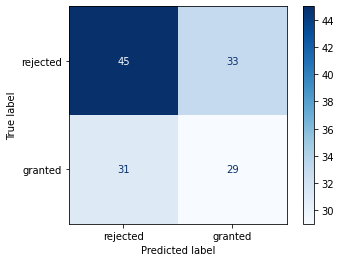

The average f1-micro average of the gnb classifier is:  0.8333333333333334
The average f1-macro average of the gnb classifier is:  0.8266994266994266
The classification report:
              precision    recall  f1-score   support

    rejected       0.82      0.91      0.86        78
     granted       0.86      0.73      0.79        60

    accuracy                           0.83       138
   macro avg       0.84      0.82      0.83       138
weighted avg       0.84      0.83      0.83       138



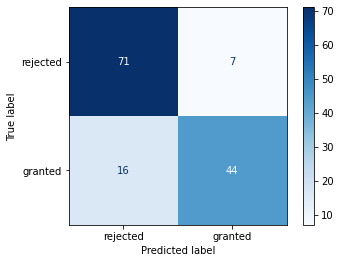

The average f1-micro average of the kNN classifier is:  0.7028985507246377
The average f1-macro average of the kNN classifier is:  0.6871094398053421
The classification report:
              precision    recall  f1-score   support

    rejected       0.70      0.82      0.76        78
     granted       0.70      0.55      0.62        60

    accuracy                           0.70       138
   macro avg       0.70      0.69      0.69       138
weighted avg       0.70      0.70      0.70       138



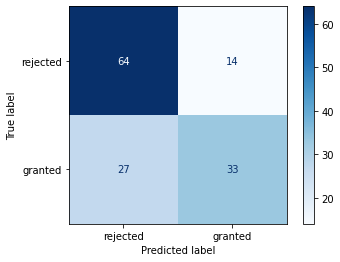

3


In [20]:
# dict that maps the classifier with its model
classifiers = {
    'dummy': dummy,
    'gnb': gnb,
    'kNN': knn

}

f1_scores_default = runEstimators(final_train, final_test, train_labels, test_labels, 
                                  my_transformers={}, my_classifiers=classifiers, 
                                  est_values_mapper={}, cv=None, showResults=True)

Στη συνέχεια, έχοντας αποθηκεύσει τις τιμές των μετρικών F1-micro average και F1-macro average, τις αναπαριστούμε γραφικά:

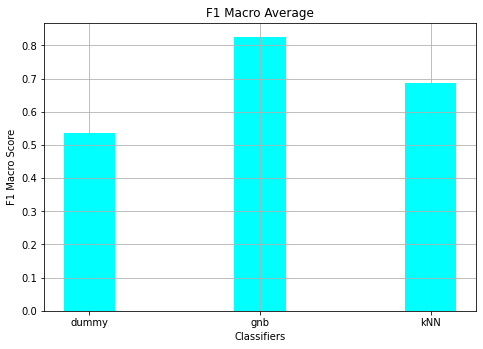

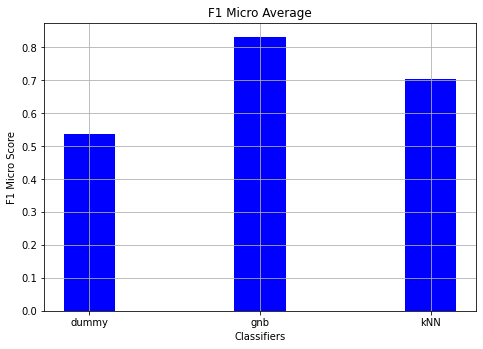

In [53]:
# plot for f1-macro average
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clfs = [label[:-1] for label in f1_scores_default['preds'].keys()]
f1_macro_scores = [f1_score(test_labels, pred, average='macro') for pred in f1_scores_default['preds'].values()]
ax.bar(clfs,f1_macro_scores, color='cyan', width=0.3)
plt.title("F1 Macro Average")
plt.xlabel("Classifiers")
plt.ylabel("F1 Macro Score")
plt.grid()
plt.show()


# plot for f1-micro average
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
f1_micro_scores = [f1_score(test_labels, pred, average='micro') for pred in f1_scores_default['preds'].values()]
ax.bar(clfs,f1_micro_scores, color='b', width=0.3)
plt.title("F1 Micro Average")
plt.xlabel("Classifiers")
plt.ylabel("F1 Micro Score")
plt.grid()
plt.show()


###Σχολιασμός αποτελεσμάτων

Για την απόδοση των τριών ταξινομητών στα δεδομένα εισόδου έχουμε στη διάθεσή μας τις μετρικές:

* **Precision**: Δηλώνει για κάθε κλάση την ακρίβεια των positive προβλέψεων, δηλαδή κατά πόσο ήταν θετικά αυτά που το μοντέλο δήλωσε ως θετικά. Προκύπτει από τον τύπο: **TP/ (TP + FP)**. Αν εφαρμόσουμε τον τύπο στα κατάλληλα δεδομένα των πινάκων σύγχυσης προκύπτουν οι τιμές που εφμανίζονται στο πεδίο  Precision του classification report για την αντίστοιχη κλάση. 


* **Recall**: Δηλώνει τι ποσοστό από τα positives για την κάθε κλάση προβλέψαμε σωστά. Προκύπτει από τον τύπο: TP /(TP + FN). Αν εφαρμόσουμε τον τύπο στα κατάλληλα δεδομένα των πινάκων σύγχυσης προκύπτουν οι τιμές που εφμανίζονται στο πεδίο  Recall του classification report για την αντίστοιχη κλάση. 


* **f1 -score**: Δηλώνει τι ποσοστό των θετικών προβλέψεων, για κάθε κλάση, ήταν σωστά. Προκύπτει από τον τύπο :

    F1 Score = 2*(Recall * Precision) / (Recall + Precision)    
και αν εφαρμόσουμε τις τιμές που προέκψαν προηγουμένως καταλήγουμε στα ίδια αποτελέσματα που υπάρχουν στo classification report, για την αντίστοιχη κλάση.

Μελετώντας τις τιμές για τους τρεις classifiers:

* Για τον **dummy**: Τα αποτελέσματα δεν ήταν ικανοποιητικά. Η μέθοδος που χρησιμοποιείται από default στον dummy classifier ονομάζεται "stratified" και για την αντιστοίχιση των κλάσεων λαμβάνει υπόψιν μόνο τη διατήρηση της ίδιας κατανομής των κλάσεων με αυτή στο train data. Σε κάθε επανάληψη του predict τα αποτελέσματα παρουσιάζουν μεταβολές, ωστόσο σε κάθε περίπτωση οι όλοι δείκτες κινούνται σε αναμενόμενες τιμές. Συγκεκριμένα, είναι λογικό να προβλέπει σταθερά περισσότερα *rejected*, δεδομένου ότι στο αρχικό dataset η κατανομή rejected-granted ήταν περίπου 55%- 45% και με ένα τυχαίο split η κατανομή στο train dataset θα είναι περίπου η ίδια. 

* Για τον **Naive Gaussain Bayes**: Συγκέτρωσε πολλά δείγματα στην κύρια διαγώνιο του confusion matrix.

* Για τον **k-NN**: Τα αποτελέσματά του ήταν καλύτερα από τον "dummy", αλλά χειρότερα από τον gnb. Σημείωσε μετριο precision και σχετικά καλό Recall για το rejected, αλλά κακό για το Granted. Μια πιθανή εξήγηση σε αυτό θα ήταν ότι μπορεί να υπάρχουν συγκεκριμένα κριτήρια απόρριψης για την πίστωση, οπότε τα διανύσματα των δειγμάτων θα ήταν κοντινά. Αντίθετα, για την έγκριση πίστωσης μπορεί να είναι περισσότεροι οι παράγοντες και τα διανύσματα των δειγμάτων πολύ διαφορετικά. Επομένως, με μεγαλύτερο k, μπορεί να είχαμε μεγαλύτερο Recall για την κλάση granted.

##Βελτιστοποίηση ταξινομητών

Ασχολούμαστε με τον κάθε ταξινομητή ξεχωριστά:


Αρχικά βρίσκουμε το πλήθος των πιθανών συνδυασμών όλων των ταξινομητών (με τη σωστή διάταξη) και στη συνέχεια για κάθε συνδυασμό εφαρμόζουμε Cross Validation με τις αντίστοιχες τιμές των υπερπαραμέτρων. Στο τέλος του κάθε Cross Validation, αποθηκεύουμε, μεταξύ άλλων, τις τιμές f1-micro και f1-macro. Έτσι, αφού ολοκληρωθούν όλα τα Cross Validations, έχουμε στη διάθεσή μας όλες τις μετρικές που μας απασχολούν. Ταξινομόντας με βάση την μετρική που θέλουμε βρίσκουμε τον βέλτιστο συνολικά ταξινομητή, με κανένα, λίγους ή περισσότερους μετασχηματιστές πριν από τον εκτιμητή.

Εκτελούμε τις παρακάτω εντολές για να βρούμε τη διακύμανση στις τιμές των διαφόρων χαρακτηριστικών:

In [22]:
train_variance = final_train.var(axis=0)
print(train_variance)
print(np.max(train_variance))
print(sorted(train_variance)[:10])

[1.36214048e+02 2.50808996e+01 1.13895028e+01 2.54195514e+01
 3.08196317e+04 1.31891623e+07 2.09564036e-01 2.09564036e-01
 1.80831233e-03 1.76157845e-01 1.75170001e-01 1.76157845e-01
 1.80831233e-03 1.75170001e-01 7.18303665e-02 1.69105099e-01
 5.46103760e-02 3.99305556e-02 3.65961720e-02 6.56604442e-02
 8.08883375e-02 1.60385161e-02 6.72127704e-02 5.62086484e-02
 9.54598561e-02 3.61006091e-03 8.23750263e-02 5.62086484e-02
 8.08883375e-02 1.07514178e-02 7.33564377e-02 1.61730729e-01
 1.25203476e-02 5.40524575e-03 1.80831233e-03 2.42438563e-01
 1.07514178e-02 2.49051539e-01 2.49051539e-01 2.45746692e-01
 2.45746692e-01 2.47948829e-01 2.47948829e-01 8.53287125e-02
 8.97592418e-03 7.78952689e-02]
13189162.332936227
[0.001808312329342575, 0.0018083123293425759, 0.0018083123293425759, 0.0036100609115731984, 0.005405245746691872, 0.00897592417559336, 0.010751417769376178, 0.010751417769376178, 0.012520347616047048, 0.016038516068052934]


###Mετρική απόδοσης: **f1-macro**:

In [23]:
def getResults(scores, opt_est, test, test_labels, class0, class1):
    print("\n=========================================================================\nRESULTS")
    best_estimator = scores['best_estimator'][opt_est]
    print("Best estimator is: ", best_estimator)
    print("steps: ", best_estimator.named_steps)
    # confusion matrix
    disp1 = plot_confusion_matrix(best_estimator, test, test_labels,
                                        display_labels=[class0, class1],
                                        cmap=plt.cm.Blues)
    plt.show()

    # print results
    print("The average f1-micro average is: ", f1_score(test_labels, scores['preds'][opt_est], average='micro'))
    print("The average f1-macro average is: ", f1_score(test_labels, scores['preds'][opt_est], average='macro'))
    print("Classification report:\n", classification_report(test_labels, scores['preds'][opt_est], target_names=[class0, class1]))
    print("Fit time: ", scores['fit_time'][opt_est])
    print("Predict time: ", scores['predict_time'][opt_est])

####Dummy Classifier


In [56]:
import operator


def findDummyStrategy(train, test, train_labels, test_labels, metric, class0, class1):

    strategies = ['uniform', 'most_frequent', 'stratified']

    max_metric = 0
    best_strategy = ''
    for strategy in strategies:
        pipe = Pipeline(steps=[('dummy', DummyClassifier(strategy=strategy))])
        pipe.fit(train, train_labels)
        preds = pipe.predict(test)
        current_metric = f1_score(test_labels, preds, average=metric)
        if max_metric < current_metric:
            max_metric  = current_metric
            best_strategy = strategy


    print('Best dummy strategy is: \033[1m','\033[36m', best_strategy,'\033[0m','\n')
    pipe = Pipeline(steps=[('dummy', DummyClassifier(strategy=best_strategy))])

    fit_start_time = time.time()
    pipe.fit(train, train_labels)
    fit_time = time.time() - fit_start_time

    predict_start_time = time.time()
    preds = pipe.predict(test)
    predict_time = time.time() - predict_start_time

    disp1 = plot_confusion_matrix(pipe, test, test_labels,
                                display_labels=[class0, class1],
                                cmap=plt.cm.Blues)
    plt.show()

    # print results
    print("The average f1-micro average is: ", f1_score(test_labels, preds, average='micro'))
    print("The average f1-macro average is: ", f1_score(test_labels, preds, average='macro'))
    print("Classification report:\n", classification_report(test_labels, preds, target_names=[class0, class1]))
    print("Fit time: ", fit_time)
    print("Predict time: ", predict_time)

    return (preds, fit_time, predict_time)

Best dummy strategy is:   stratified  



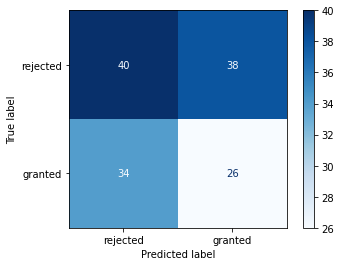

The average f1-micro average is:  0.5144927536231884
The average f1-macro average is:  0.5051115987796392
Classification report:
               precision    recall  f1-score   support

    rejected       0.57      0.58      0.57        78
     granted       0.44      0.43      0.44        60

    accuracy                           0.51       138
   macro avg       0.51      0.51      0.51       138
weighted avg       0.51      0.51      0.51       138

Fit time:  0.0011355876922607422
Predict time:  0.00012445449829101562


In [25]:
findDummyStrategy(final_train, final_test, train_labels, test_labels, 'macro', 'rejected', 'granted')

####Gaussian Naive Bayes Classifier


#####Επεξήγηση του ταξινομητή Gaussian Naive Bayes

Ο Gaussian Nauve Bayes υποθέτει οτι τα χαρακτηριστικά είναι **ανεξάρτητα** μεταξύ τους. Έτσι συνδέει κάθε χαρακτηριστικό xi με κάθε κλάση y με την πιθανότητα **P(xi∣y)**, η οποία υποθέτει πως ακολουθεί γκαουσιανή κατανομή. 

Χρησιμοποιεί τα δεδομένα προκειμένου για κάθε κλάση και χαρακτηριστικό, το οποίο παίρνει συνεχείς τιμές, να βρει τη μέση τιμή μ_y και τη διακύμανση (σ_y)^2 κάθε χαρακτηριστικού για τη κλάση y. 

Στην φάση του testing λαμβάνει υπόψην του τα γινόμενα των παραπάνω πιθανοτήτων των χαρακτηριστικών για κάθε κλάση, καθώς και την πιθανότητα της ίδιας της κλάσης και αναθέτει στο δείγμα την κλάση που μεγιστοποιεί το τελικό γινόμενο.

 [[], ['min_max_scaler'], ['scaler'], ['ros'], ['rus'], ['pca'], ['min_max_scaler', 'selector'], ['min_max_scaler', 'ros'], ['min_max_scaler', 'rus'], ['min_max_scaler', 'pca'], ['scaler', 'ros'], ['scaler', 'rus'], ['scaler', 'pca'], ['ros', 'pca'], ['rus', 'pca'], ['min_max_scaler', 'selector', 'ros'], ['min_max_scaler', 'selector', 'rus'], ['min_max_scaler', 'selector', 'pca'], ['min_max_scaler', 'ros', 'pca'], ['min_max_scaler', 'rus', 'pca'], ['scaler', 'ros', 'pca'], ['scaler', 'rus', 'pca'], ['min_max_scaler', 'selector', 'ros', 'pca'], ['min_max_scaler', 'selector', 'rus', 'pca']] 
[('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gnb', GaussianNB(priors=Non

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0062s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0086s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0079s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent 

[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{'pca__n_components': [10, 15, 20, 30]}
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[('sc

[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0105s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0105s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0110s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 

[('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{'pca__n_components': [10, 15, 20, 30]}
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{'pca__n_components': [10, 15, 20, 30]}
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', VarianceThreshold(threshold=0.0)), ('ros', RandomOverSampler(random_state=

[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0117s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0117s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0447s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.2s


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', VarianceThreshold(threshold=0.0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{'selector__threshold': [0, 0.0018, 0.008, 0.017], 'pca__n_components': [10, 15, 20, 30]}
Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0123s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0155s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n

[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{'pca__n_components': [10, 15, 20, 30]}
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{'pca__n_components': [10, 15, 20, 30]}
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[('scaler', StandardS

[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0118s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_j

[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{'pca__n_components': [10, 15, 20, 30]}
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', VarianceThreshold(threshold=0.0)), ('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{'selector__threshold': [0, 0.0018, 0.008, 0.017], 'pca__n_components

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0817s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0169s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0391s.) Setting batch_size=4.


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', VarianceThreshold(threshold=0.0)), ('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{'selector__threshold': [0, 0.0018, 0.008, 0.017], 'pca__n_components': [10, 15, 20, 30]}
Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0744s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.2s finished


24

RESULTS
Best estimator is:  Pipeline(memory='tmp',
         steps=[('min_max_scaler',
                 MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('rus',
                 RandomUnderSampler(random_state=None, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
steps:  {'min_max_scaler': MinMaxScaler(copy=True, feature_range=(0, 1)), 'rus': RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto'), 'pca': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='a

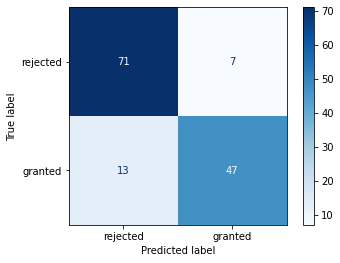

The average f1-micro average is:  0.855072463768116
The average f1-macro average is:  0.8505523066926575
Classification report:
               precision    recall  f1-score   support

    rejected       0.85      0.91      0.88        78
     granted       0.87      0.78      0.82        60

    accuracy                           0.86       138
   macro avg       0.86      0.85      0.85       138
weighted avg       0.86      0.86      0.85       138

Fit time:  0.0709371566772461
Predict time:  0.0004634857177734375


In [28]:
# dict that has the parameters for cross validation
est_values_mapper = {
    'selector': [0, 0.0018, 0.008, 0.017],
    'pca': [10, 15, 20, 30],
}

transformers = {
    'min_max_scaler': min_max_scaler,
    'selector': selector,
    'scaler': scaler,
    'ros': ros,
    'rus': rus,
    'pca': pca
}

f1_scores_gnb = runEstimators(train=final_train, test=final_test, train_labels=train_labels, test_labels=test_labels,
                              my_transformers=transformers, my_classifiers={'gnb': gnb}, est_values_mapper=est_values_mapper)


# compute f1-macro
gnb_macro = {k: f1_score(test_labels, v, average='macro') for k,v in f1_scores_gnb['preds'].items()}
# get the estimator with the maximum f1-macro
opt_est_gnb_macro = max(gnb_macro.items(), key=operator.itemgetter(1))[0]
getResults(f1_scores_gnb, opt_est_gnb_macro, final_test, test_labels, "rejected", "granted")

Ο ταξινομητής Gaussian Naive Bayes δεν διαθέται κάποιες υπερπαραμέτρους προς βελτιστοποίηση. Επομένως, η μελέτη των υπερπαραμέτρων του συνολικού ταξινομητή αφορά μόνο τους μετασχηματιστές. 

Ύστερα, από GridSearchCV σε κάθε συνδυασμό των μετασχηματιστών την καλύτερη τιμή f1 macro average, **0.8505**, παρουσίασε η ακολουθία:

* MinMaxScaler
* RandomUnderSampler
* PCA(n_components=10)

Με αυτόν τον τρόπο έγινε κανονικοποίηση των δεδομένων με την μέθοδο MinMaxScaler, δηλαδή με την διαίρεση με τη διαφορά μεγίστου-ελαχίστου (feature scaling) οπότε οι τιμές όλων των χαρακτηριστικών κλιμακώνονται γραμμικά στο διάστημα [0,1] και στη συνέχεια υποδειγματοληψία της κλάσης που εμφανίζεται με μεγαλύτερη συχνότητα. Τέλος, εφαρμόστηκε η μέθοδος PCA, που μείωσε τη διαστατικότητα, εξάγοντας νέα γραμμικά ασυσχέτιστα χαρακτηριστικά.

####k-Nearest Neighbors  Classifier


 [[], ['min_max_scaler'], ['scaler'], ['ros'], ['rus'], ['pca'], ['min_max_scaler', 'selector'], ['min_max_scaler', 'ros'], ['min_max_scaler', 'rus'], ['min_max_scaler', 'pca'], ['scaler', 'ros'], ['scaler', 'rus'], ['scaler', 'pca'], ['ros', 'pca'], ['rus', 'pca'], ['min_max_scaler', 'selector', 'ros'], ['min_max_scaler', 'selector', 'rus'], ['min_max_scaler', 'selector', 'pca'], ['min_max_scaler', 'ros', 'pca'], ['min_max_scaler', 'rus', 'pca'], ['scaler', 'ros', 'pca'], ['scaler', 'rus', 'pca'], ['min_max_scaler', 'selector', 'ros', 'pca'], ['min_max_scaler', 'selector', 'rus', 'pca']] 
[('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1212s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1282s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1291s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1254s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1284s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'pca__n_components': [10, 15, 20, 30], 'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1376s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', VarianceThreshold(threshold=0.0)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'selector__threshold': [0, 0.0018, 0.008, 0.017], 'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1255s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1307s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1289s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'pca__n_components': [10, 15, 20, 30], 'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1257s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1174s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1170s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'pca__n_components': [10, 15, 20, 30], 'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1308s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'pca__n_components': [10, 15, 20, 30], 'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1275s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'pca__n_components': [10, 15, 20, 30], 'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1253s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', VarianceThreshold(threshold=0.0)), ('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'selector__threshold': [0, 0.0018, 0.008, 0.017], 'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1312s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', VarianceThreshold(threshold=0.0)), ('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'selector__threshold': [0, 0.0018, 0.008, 0.017], 'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1333s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', VarianceThreshold(threshold=0.0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'selector__threshold': [0, 0.0018, 0.008, 0.017], 'pca__n_components': [10, 15, 20, 30], 'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 400 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1295s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elap

[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'pca__n_components': [10, 15, 20, 30], 'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1290s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'pca__n_components': [10, 15, 20, 30], 'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1298s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'pca__n_components': [10, 15, 20, 30], 'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1303s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'pca__n_components': [10, 15, 20, 30], 'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1281s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', VarianceThreshold(threshold=0.0)), ('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'selector__threshold': [0, 0.0018, 0.008, 0.017], 'pca__n_components': [10, 15, 20, 30], 'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 400 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1242s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elap

[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('selector', VarianceThreshold(threshold=0.0)), ('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'selector__threshold': [0, 0.0018, 0.008, 0.017], 'pca__n_components': [10, 15, 20, 30], 'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 400 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1308s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elap

24

RESULTS
Best estimator is:  Pipeline(memory='tmp',
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ros',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=39, p=2,
                                      weights='uniform'))],
         verbose=False)
steps:  {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'ros': RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto'), 'kNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metri

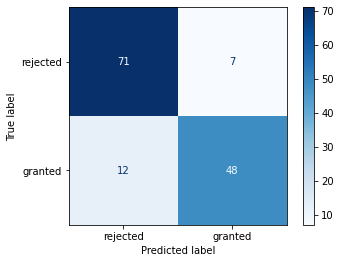

The average f1-micro average is:  0.8623188405797102
The average f1-macro average is:  0.8583850931677018
Classification report:
               precision    recall  f1-score   support

    rejected       0.86      0.91      0.88        78
     granted       0.87      0.80      0.83        60

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138

Fit time:  2.9203712940216064
Predict time:  0.10509514808654785


In [29]:
est_values_mapper_knn = {
    'selector': [0, 0.0018, 0.008, 0.017],
    'pca': [10, 15, 20, 30],
    'kNN': {
        "kNN__n_neighbors":[i for i in range(1, 51, 2)]
    }
}

f1_scores_knn = runEstimators(train=final_train, test=final_test, train_labels=train_labels, test_labels=test_labels,
                              my_transformers=transformers, my_classifiers={'kNN': knn}, 
                              est_values_mapper=est_values_mapper_knn)

# compute f1-macro
knn_macro = {k: f1_score(test_labels, v, average='macro') for k,v in f1_scores_knn['preds'].items()}
# get the estimator with the maximum f1-macro
opt_est_knn_macro = max(knn_macro.items(), key=operator.itemgetter(1))[0]
getResults(f1_scores_knn, opt_est_knn_macro, final_test, test_labels, "rejected", "granted")

Οι υπερπαράμετροι προς βελτιστοποίηση στον εκτιμητή με τελικό ταξινομητή τον k_NN Classifier είναι το πλήθος γειτόνων k.

Η βέλτιστη τιμή στην μετρική f1 macro average, η οποία ήταν **0.8583** προέκυψε από τις τιμές:

* k = **39**

Oι μετασχηματιστές που χρησιμοποιήθηκαν ήταν οι **StandardScaler** και **RandomOverSampler** που κανονικοποιούν και υπερδειγματοληπτούν αντίστοιχα τα δεδομένα.

ΧΡΟΝΟΙ

Παρακάτω υλοιποιούνται οι συναρτήσεις που τυπώνουν τους χρόνους εκπαίδευσης και πρόβλεψης, παράγουν γράφημα με την μετρική, f1 macro average, για την κάθε ταξινομητή και τυπώνουν πίνακα σύγκρισης της μετρικής για τους default και τους optimized ταξινομητές αντίστοιχα.

In [44]:
def printRunTimes(dummy_scores, gnb_scores, knn_scores, dummy_opt, gnb_opt, knn_opt):

    values = [[dummy_scores['fit_time'][dummy_opt], gnb_scores['fit_time'][gnb_opt], knn_scores['fit_time'][knn_opt]],
              [dummy_scores['predict_time'][dummy_opt], gnb_scores['predict_time'][gnb_opt], knn_scores['predict_time'][knn_opt]]]

    tmp = [sum(i) for i in np.array(values).T]

    values.append(tmp)

    cols = ['Dummy', 'GNB', 'KNN']
    df = pd.DataFrame(values, columns=cols, index=['Fit Time', 'Predict Time', 'Total Time'])
    print(df)


In [ ]:
printRunTimes(f1_scores, f1_scores_gnb, f1_scores_knn, opt_est_dummy_macro, opt_est_gnb_macro, opt_est_knn_macro)

barplot for every classifier

In [ ]:
# plot for f1-macro average
def plotMetrics(dummy_metric, gnb_metric, knn_metric, dummy_opt, gnb_opt, knn_opt, metric):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    clfs = ['dummy', 'gnb', 'knn']
    f1_metric_scores = [
                    dummy_metric[dummy_opt],
                    gnb_metric[gnb_opt],
                    knn_metric[knn_opt]
    ]
    
    ax.bar(clfs,f1_metric_scores, color='cyan', width=0.3)
    plt.title("F1 "+metric+" Average")
    plt.xlabel("Classifiers")
    plt.ylabel("F1 "+metric+" Score")
    plt.grid()
    plt.show()

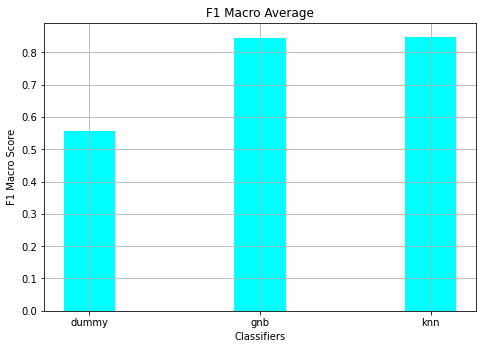

In [ ]:
plotMetrics(dummy_macro, gnb_macro, knn_macro, opt_est_dummy_macro, opt_est_gnb_macro, opt_est_knn_macro, "Macro")

μεταβολή της επίδοσης των ταξινομητών πριν και μετά τη βελτιστοποίησή τους.


In [ ]:
def printPerformanceProgress(default_scores, dummy_metric, gnb_metric, knn_metric, dummy_opt, gnb_opt, knn_opt):

    values = [
              default_scores,
              [dummy_metric[dummy_opt],gnb_metric[gnb_opt],knn_metric[knn_opt]]
              ]


    cols = ['Dummy', 'GNB', 'KNN']
    df = pd.DataFrame(values, columns=cols, index=['Default', 'Optimized'])
    print(df)

In [ ]:
printPerformanceProgress(f1_macro_scores, dummy_macro, gnb_macro, knn_macro, opt_est_dummy_macro, opt_est_gnb_macro, opt_est_knn_macro)

              Dummy       GNB       KNN
Default    0.440994  0.826699  0.687109
Optimized  0.557762  0.844219  0.848850


###Σχολιασμός αποτελεσμάτων

Μελετώντας τα αποτελέσματα από την βελτιστοποίηση των ταξινομητών καταλήγουμε για τους τρεις ταξινομητές:

* Για τον **Dummy**: Ο καλύτερος συνδυασμός μετασχηματιστών φάνηκε ο *stratified*, ο οποίος προβλέπει σεβόμενος την κατανομή των κλάσεων στο trainig set.


* Για τον **Gaussian Naive Bayes**: Δεν παρατηρήθηκε βελτίωση, μέσω της διαδικασίας βελτιστοποίησης, αφού η χρήση κάποιου μετασχηματιστή δεν οδήγησε σε βελτίωση της μετρικής, ενώ o GaussianNB() δεν δέχεται κάποιες υπερπαραμέτρους.

* Για τον **k-Nearest Neighbors**: Παρατηρήθηκε η μεγαλύτερη βελτίωση της μετρικής. Συγκεκριμένα, επιλέχθηκε κατάλληλος συνδυασμός μετασχηματιστών και k = 39.  

###Μετρική απόδοσης **f1-micro**

####Dummy Classifier

Best dummy strategy is:   most_frequent  



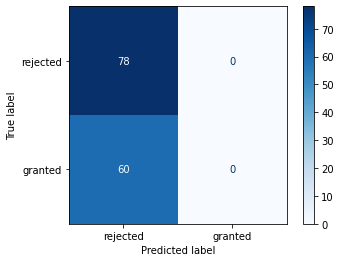

The average f1-micro average is:  0.5652173913043478
The average f1-macro average is:  0.3611111111111111
Classification report:
               precision    recall  f1-score   support

    rejected       0.57      1.00      0.72        78
     granted       0.00      0.00      0.00        60

    accuracy                           0.57       138
   macro avg       0.28      0.50      0.36       138
weighted avg       0.32      0.57      0.41       138

Fit time:  0.0008032321929931641
Predict time:  0.00015020370483398438


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [270]:
findDummyStrategy(final_train, final_test, train_labels, test_labels, 'micro', 'rejected', 'granted')

####Gaussian Naive Bayes Classifier


 [[], ['scaler'], ['min_max_scaler'], ['rus'], ['ros'], ['scaler', 'rus'], ['scaler', 'ros'], ['min_max_scaler', 'rus'], ['min_max_scaler', 'ros']] 
[('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0200s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0077s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0366s.) Setting batch

[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rus', RandomUnderSampler(random_state=None, rat

[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished


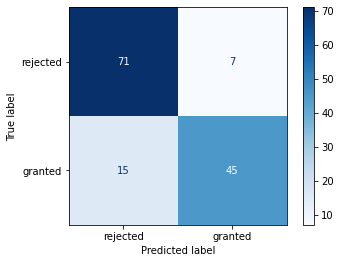

The average f1-micro average is:  0.8405797101449275
The average f1-macro average is:  0.834712543554007
Classification report:
               precision    recall  f1-score   support

    rejected       0.83      0.91      0.87        78
     granted       0.87      0.75      0.80        60

    accuracy                           0.84       138
   macro avg       0.85      0.83      0.83       138
weighted avg       0.84      0.84      0.84       138

Fit time:  0.04708528518676758
Predict time:  0.00024390220642089844


In [46]:
est_values_mapper = {
    'selector': [0, 0.0018, 0.008, 0.017],
    'pca': [10, 15, 20, 30],
}

f1_scores_gnb_micro = runEstimators(train=final_train, test=final_test, train_labels=train_labels, test_labels=test_labels,
                                    my_transformers=transformers, my_classifiers={'gnb': gnb}, 
                                    est_values_mapper=est_values_mapper, scoring='f1_micro')


# compute f1-micro
gnb_micro = {k: f1_score(test_labels, v, average='micro') for k,v in f1_scores_gnb_micro['preds'].items()}
# get the estimator with the maximum f1-micro
opt_est_gnb_micro = max(gnb_micro.items(), key=operator.itemgetter(1))[0]
getResults(f1_scores_gnb_micro, opt_est_gnb_micro, final_test, test_labels, "rejected", "granted")

Ο ταξινομητής Gaussian Naive Bayes δεν διαθέται κάποιες υπερπαραμέτρους προς βελτιστοποίηση. Επομένως, η μελέτη των υπερπαραμέτρων του συνολικού ταξινομητή αφορά μόνο τους μετασχηματιστές.

Ύστερα, από GridSearchCV σε κάθε συνδυασμό των μετασχηματιστών την καλύτερη τιμή f1 macro average, **0.8405**, παρουσίασε η ακολουθία:


* RandomUnderSampler

Με αυτόν τον τρόπο έγινε υποδειγματοληψία της κλάσης που εμφανίζεται με μεγαλύτερη συχνότητα.

####k-Nearest Neighbors  Classifier


 [[], ['scaler'], ['min_max_scaler'], ['rus'], ['ros'], ['scaler', 'rus'], ['scaler', 'ros'], ['min_max_scaler', 'rus'], ['min_max_scaler', 'ros']] 
[('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1280s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1253s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1243s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1295s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1222s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1264s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1311s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1192s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'))]
{'kNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}
Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1283s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.0s finished


9

RESULTS
Best estimator is:  Pipeline(memory='tmp',
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=29, p=2,
                                      weights='uniform'))],
         verbose=False)
steps:  {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'kNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=29, p=2,
                     weights='uniform')}


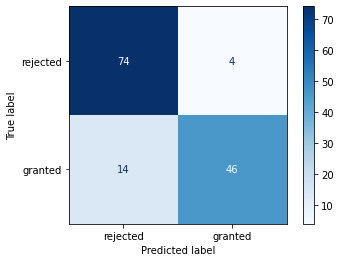

The average f1-micro average is:  0.8695652173913043
The average f1-macro average is:  0.8639649507119387
Classification report:
               precision    recall  f1-score   support

    rejected       0.84      0.95      0.89        78
     granted       0.92      0.77      0.84        60

    accuracy                           0.87       138
   macro avg       0.88      0.86      0.86       138
weighted avg       0.88      0.87      0.87       138

Fit time:  2.9103219509124756
Predict time:  0.10481095314025879


In [47]:
est_values_mapper_knn = {
    'selector': [0, 0.0018, 0.008, 0.017],
    'pca': [10, 15, 20, 30],
    'kNN': {
        "kNN__n_neighbors":[i for i in range(1, 51, 2)]
    }
}

f1_scores_knn_micro = runEstimators(final_train, final_test, train_labels, test_labels, 
                                    my_transformers=transformers, my_classifiers={'kNN': knn}, 
                                    est_values_mapper=est_values_mapper_knn, scoring='f1_micro')

# compute f1-micro
knn_micro = {k: f1_score(test_labels, v, average='micro') for k,v in f1_scores_knn_micro['preds'].items()}
# get the estimator with the maximum f1-micro
opt_est_knn_micro = max(knn_micro.items(), key=operator.itemgetter(1))[0]

getResults(f1_scores_knn_micro, opt_est_knn_micro, final_test, test_labels, "rejected", "granted")

Επιλέγοντας **k = 29** και χρησιμοποιώντας 

In [ ]:
printRunTimes(f1_scores_micro, f1_scores_gnb_micro, f1_scores_knn_micro,
              opt_est_dummy_micro, opt_est_gnb_micro, opt_est_knn_micro)

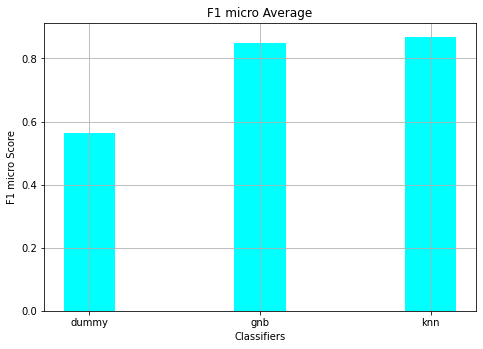

In [ ]:
plotMetrics(dummy_micro, gnb_micro, knn_micro,
            opt_est_dummy_micro, opt_est_gnb_micro, opt_est_knn_micro, "micro")

In [ ]:
printPerformanceProgress(f1_micro_scores, dummy_micro, gnb_micro, knn_micro,
                         opt_est_dummy_micro, opt_est_gnb_micro, opt_est_knn_micro)

              Dummy       GNB       KNN
Default    0.456522  0.833333  0.702899
Optimized  0.565217  0.847826  0.869565


###Σχολιασμός αποτελεσμάτων

#Μεγάλο Dataset

Αρχικά κατεβάζουμε το συμπιεσμένο αρχείο, το αποθηκεύουμε ως data.zip και στη συνέχεια το αποσυμπιέζουμε, οπότε παράγονται 5 αρχείο τύπου .arff

In [31]:
download("http://archive.ics.uci.edu/ml/machine-learning-databases/00365/data.zip", 'data.zip')
!unzip data.zip

File downloaded
Archive:  data.zip
  inflating: 1year.arff              
  inflating: 2year.arff              
  inflating: 3year.arff              
  inflating: 4year.arff              
  inflating: 5year.arff              


Για να μετατρέψουμε τα αρχεία σε .csv, αρκεί να κρατήσουμε μόνο τις γραμμές που δεν ξεκινάνε με “%”, “@” και δεν είναι κενές.
Επομένως, για καθένα από τα .arff αρχεία εκτελούμε την εντολή:
```
cat ${file} | grep -ve "^@\|^%" | grep -v "^[[:space:]]*$" >> data.csv
```
Η εντολή αυτή θα τυπώσει μόνο τις επιθυμητές γραμμές και θα ανακατευθύνει το αποτέλεσμα στο αρχείο data.csv, προσθέτοντάς το στο τέλος του.

Για να πραγματοποιήσουμε αυτήν τη διαδικασία για όλα τα .arff εκτελούμε τα παρακάτω:

In [32]:
%%shell
truncate -s 0 data.csv  #create or empty the data.csv file
for file in ./*.arff    #for every .arff file in the current directory
do
    echo ${file}        #print file name for checking the progress purposes
    cat ${file} | grep -ve "^@\|^%" | grep -v "^[[:space:]]*$" >> data.csv  #print the lines with the samples in the end of data.csv file
done
wc -l data.csv          #check the length of the final file

./1year.arff
./2year.arff
./3year.arff
./4year.arff
./5year.arff
43405 data.csv


In [33]:
import pandas as pd

big_df = pd.read_csv("data.csv", header=None)
# print df
big_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0.24976,0.6598,0.1666,0.24976,497.42,0.73378,2.6349,0.24976,0.14942,43.37,1.2479,0.21402,0.11998,0.47706,0.50494,0.60411,1.4582,1.7615,5.9443,0.11788,0.14942,94.14,3.8772,0.56393,0.21402,1.741,593.27,0.50591,0.12804,0.66295,0.051402,0.12804,114.42,71.05,1.0097,1.5225,49.394,0.1853,0.11085,2.042,0.37854,0.25792,2.2437,2.248,348690,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,0.26114,0.5168,0.15835,0.25834,677.96,0.53838,2.0005,0.25834,0.152,87.981,1.4293,0.24806,0.12304,?,0.39542,0.43992,88.444,16.946,3.6884,0.26969,0.152,122.17,2.9876,2.9876,0.20616,1.6996,?,0.49788,0.1213,0.086422,0.064371,0.14595,199.49,111.51,0.51045,1.1252,100.13,0.23727,0.13961,1.9447,0.49988,0.33472,17.866,17.866,2304.6,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,0.31258,0.64184,0.24435,0.30906,794.16,0.45961,1.4369,0.30906,0.2361,73.133,1.4283,0.3026,0.18996,?,0.28932,0.37282,86.011,1.0627,4.3749,0.41929,0.23815,176.93,2.063,1.4274,0.31565,1.309,2.3019,0.51537,0.24114,0.32202,0.07402,0.23117,165.51,92.381,0.94807,1.0101,96.372,0.29181,0.22293,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.1155,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.1155,1.3562,?,0.57353,0.088995,0.40139,0.069622,0.088995,180.77,100.98,0.2872,1.5696,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,0.18732,0.33147,0.12182,0.18732,1133.2,0.32211,1.6307,0.18732,0.11553,57.045,?,0.19832,0.11553,0.18732,0.38677,0.32211,1.4138,1.1184,4.1424,0.27884,0.11553,147.04,2.4823,0.3234,0.19832,1.6278,11.247,0.43489,0.12231,0.29304,0.09668,0.12231,141.62,84.574,0.73919,0.95787,65.936,0.18811,0.11601,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.1722,-18.907,0,0.013981,0.416,1.6768,0.29379,0.041583,0.061959,0.023622,0.013981,6507.6,0.056089,1.416,0.013981,0.008338,27.092,1.033,0.040401,0.007692,0.90184,0.083706,0.054556,1.4637,0.052831,4.9667,0.41853,0.024762,50.128,7.4,2.3644,0.033819,1.6768,0.3785,0.66377,0.020169,0.022858,0.35651,0.024093,56.452,29.36,0.10363,0.62061,27.207,0.014771,0.008809,0.37454,0.22564,0.13514,0.39944,0.90248,3599.1,0.020169,0.043904,1.0122,1.2594,13.472,12.432,49.117,7.4313,2.2799,1
43401,-0.57805,0.96702,-0.80085,0.16576,-67.365,-0.57805,-0.57805,-0.40334,0.93979,-0.39004,-0.57805,-0.60216,-0.11022,-0.57805,-742.28,-0.49173,1.0341,-0.57805,-0.13399,3.2965,0.6477,-0.53492,-0.13399,-0.57805,-0.39004,-0.49173,?,-0.9524,4.0622,0.21864,-0.13399,76.33,4.7819,-0.55316,-0.53492,4.3912,17.036,-0.38299,-0.12399,0.024771,-0.073529,-0.12399,11.451,8.1548,-14.836,0.12517,3.098,-0.63746,-0.14776,0.16455,0.95997,0.20912,-0.46385,-0.45546,-9242.1,-0.064073,1.482,1.0641,-0.018084,110.72,44.759,81.22,4.494,5.1305,1
43402,-0.17905,1.2553,-0.27599,0.74554,-120.44,-0.17905,-0.15493,-0.26018,1.1749,-0.32659,-0.15493,-0.14284,-0.07294,-0.15493,-3298.2,-0.11067,

##Βασικές Πληροφορίες

###Πληροφορίες dataset
Το dataset, πρόκειται επομένως για ένα σύνολο **43405 δειγμάτων**, με κάθε δείγμα να έχει **64 χαρακτηριστικά**. Η τελευταία στήλη είναι η κλάση στην οποία ανήκει το δείγμα, δηλαδή δηλώνει αν πτώχευσε (1) ή όχι (0) η συγκεκριμένη εταιρεία.

Πιο συγκεκριμένα, το dataset *Polish companies bankruptcy* αποτελεί ένα σύνολο δεδομένων σχετικά με πολωνικές εταιρείες που πτώχευσαν ή όχι παραθέτοντας αρκετά (64) χαρακτηριστικά τους. Τα στοιχεία έχουν συλλεγεί ως 5 διαφορετικά σύνολα που το καθένα αντιστοιχεί σε 5 διαφορετικά έτη. Παρολαυτά στα πλαίσια της παρούσας εργασίας τα 5 σύνολα δεδομένων θα αντιμετωπιστούν ως ένα ενιαίο σύνολο δεδομένων.

Παρακάτω παρατίθεται μία σύντομη περιγραφή του καθενός από τα χαρακτηριστικά των δειγμάτων που υπάρχουν στο dataset:

| Attribute | Description                                                                                                         |
|-----------|---------------------------------------------------------------------------------------------------------------------|
| X1        | net profit / total assets                                                                                           |
| X2        | total liabilities / total assets                                                                                    |
| X3        | working capital / total assets                                                                                      |
| X4        | current assets / short-term liabilities                                                                             |
| X5        | [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 |
| X6        | retained earnings / total assets                                                                                    |
| X7        | EBIT / total assets                                                                                                 |
| X8        | book value of equity / total liabilities                                                                            |
| X9        | sales / total assets                                                                                                |
| X10       | equity / total assets                                                                                               |
| X11       | (gross profit + extraordinary items + financial expenses) / total assets                                            |
| X12       | gross profit / short-term liabilities                                                                               |
| X13       | (gross profit + depreciation) / sales                                                                               |
| X14       | (gross profit + interest) / total assets                                                                            |
| X15       | (total liabilities * 365) / (gross profit + depreciation)                                                           |
| X16       | (gross profit + depreciation) / total liabilities                                                                   |
| X17       | total assets / total liabilities                                                                                    |
| X18       | gross profit / total assets                                                                                         |
| X19       | gross profit / sales                                                                                                |
| X20       | (inventory * 365) / sales                                                                                           |
| X21       | sales (n) / sales (n-1)                                                                                             |
| X22       | profit on operating activities / total assets                                                                       |
| X23       | net profit / sales                                                                                                  |
| X24       | gross profit (in 3 years) / total assets                                                                            |
| X25       | (equity - share capital) / total assets                                                                             |
| X26       | (net profit + depreciation) / total liabilities                                                                     |
| X27       | profit on operating activities / financial expenses                                                                 |
| X28       | working capital / fixed assets                                                                                      |
| X29       | logarithm of total assets                                                                                           |
| X30       | (total liabilities - cash) / sales                                                                                  |
| X31       | (gross profit + interest) / sales                                                                                   |
| X32       | (current liabilities * 365) / cost of products sold                                                                 |
| X33       | operating expenses / short-term liabilities                                                                         |
| X34       | operating expenses / total liabilities                                                                              |
| X35       | profit on sales / total assets                                                                                      |
| X36       | total sales / total assets                                                                                          |
| X37       | (current assets - inventories) / long-term liabilities                                                              |
| X38       | constant capital / total assets                                                                                     |
| X39       | profit on sales / sales                                                                                             |
| X40       | (current assets - inventory - receivables) / short-term liabilities                                                 |
| X41       | total liabilities / ((profit on operating activities + depreciation) * (12/365))                                    |
| X42       | profit on operating activities / sales                                                                              |
| X43       | rotation receivables + inventory turnover in days                                                                   |
| X44       | (receivables * 365) / sales                                                                                         |
| X45       | net profit / inventory                                                                                              |
| X46       | (current assets - inventory) / short-term liabilities                                                               |
| X47       | (inventory * 365) / cost of products sold                                                                           |
| X48       | EBITDA (profit on operating activities - depreciation) / total assets                                               |
| X49       | EBITDA (profit on operating activities - depreciation) / sales                                                      |
| X50       | current assets / total liabilities                                                                                  |
| X51       | short-term liabilities / total assets                                                                               |
| X52       | (short-term liabilities * 365) / cost of products sold)                                                             |
| X53       | equity / fixed assets                                                                                               |
| X54       | constant capital / fixed assets                                                                                     |
| X55       | working capital                                                                                                     |
| X56       | (sales - cost of products sold) / sales                                                                             |
| X57       | (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)                       |
| X58       | total costs /total sales                                                                                            |
| X59       | long-term liabilities / equity                                                                                      |
| X60       | sales / inventory                                                                                                   |
| X61       | sales / receivables                                                                                                 |
| X62       | (short-term liabilities *365) / sales                                                                               |
| X63       | sales / short-term liabilities                                                                                      |
| X64       | sales / fixed assets                                                                                                |

###Περιγραφή χαρακτηριστικών του dataset

Όπως είδαμε και προηγουμένως το σύνολο περιλαμβάνει **43405 δείγματα**, με κάθε δείγμα να έχει **64 χαρακτηριστικά**. **Όλα τα χαρακτηριστικά παίρνουν αριθμητικές, μη διατεταγμένες τιμές**.

Επίσης, το dataset **δεν** περιλαμβάνει επικεφαλίδες και αρίθμηση γραμμών.

Οι ετικέτες των κλάσεων, χρεωκοπεία ή όχι, **αναπαριστόνται με τιμές 1 και 0 αντίστοιχα και βρίσκονται στην τελευταία στήλη**.

Οι μοναδικές αλλαγές των αρχικών αρχείων .arff που χρειάστηκε να γίνουν είναι η μετατροπή τους σε αρχεία .csv, που έγινε με όπως περιγράφηκε παραπάνω. Τέλος, τα δεδομένα από τα 5 συνολικά αρχεία συγκεντρώθηκαν σε ένα μόνο αρχείο, το **data.csv**, όπως περιγράφηκε παραπάνω.

###Εντοπισμός απουσιάζουσων τιμών χαρακτηριστικών

Στη συνέχεια, θα εντοπίσουμε τις απουσιάζουσες τιμές. Αυτές δηλώνονται στο dataset με τον χαρακτήρα "?".

In [34]:
import numpy as np
from sklearn.impute import SimpleImputer
from collections import defaultdict

# replace "?" with np.NaN
big_df.replace('?',np.NaN,inplace=True)

# calculate the number of samples with at least one missing attribute
# big_df.isna() is the mask of big_df where each element is True if is NaN
# num_of_incomplete_samples_big is the length of the list of samples that have at least one True(NaN)
num_of_incomplete_samples_big = len([i for i in np.array(big_df.isna()) if True in i])

print("The samples of the dataset that have at least one missing attribute are ", num_of_incomplete_samples_big)
print("Which means that the ", num_of_incomplete_samples_big*100/big_df.shape[0], "% of the samples have missing values.", sep="")

The samples of the dataset that have at least one missing attribute are  23438
Which means that the 53.99838728257113% of the samples have missing values.


Σύμφωνα με τα αποτελέσματα, το **53.99% των δειγμάτων έχουν απουσιάζουσες τιμές**.

Βλέπουμε, λοιπόν ότι ένα πολύ μεγάλο ποσοστό των δειγμάτων έχουν τουλάχιστον μία απουσιάζουσα τιμή, επομένως η διαγραφή των δειγμάτων με απουσιάζουσες τιμές είναι απαγορευτική.

Στη συνέχεια, θα ελέγξουμε πόσες απουσιάζουσες τιμές έχει το κάθε χαρακτηριστικό:

In [35]:
# the list of the number of missing values for each attribute occurs by 
# summing the elements of the inverse of df, without df's last column.
# df's last column is the class attribute and it is alwasy present.
incomplete_attrs_big = [sum(i) for i in np.array(big_df.isna())[:,:big_df.shape[1]-1].T]
print("For each attribute of the dataset, the number of the missing values is")
print(incomplete_attrs_big)

For each attribute of the dataset, the number of the missing values is
[8, 8, 8, 134, 89, 8, 8, 94, 9, 8, 44, 134, 127, 8, 36, 95, 94, 8, 128, 127, 5854, 8, 127, 922, 8, 95, 2764, 812, 8, 127, 127, 368, 134, 94, 8, 8, 18984, 8, 127, 134, 754, 127, 127, 127, 2147, 135, 297, 9, 127, 94, 8, 301, 812, 812, 1, 127, 7, 84, 7, 2152, 102, 127, 134, 812]


In [36]:
# list of all attributes with more than 30% of their values missing
incomplete_attributes = [i for i, x in enumerate(incomplete_attrs_big) if x/big_df.shape[0] > 0.3]
print(incomplete_attributes)

for x in incomplete_attributes:
    print(incomplete_attrs_big[x]*100/big_df.shape[0], "%")
# print(incomplete_attrs_big[incomplete_attribute]*100/big_df.shape[0], "%")

[36]
43.73689667089045 %


Παρατηρούμε ότι το 43.7% των τιμών του χαρακτηριστικού 37ου (η αρίθμηση ξεκινάει από το 0) απουσιάζει. Με βάση αυτήν την παρατήρηση θα ήταν μαλλον καλύτερο να διαγραφεί εντελώς αυτή η στήλη ώστε να μην επηρεάσει αρνητικά.



In [37]:
big_df = big_df.drop(big_df.columns[[incomplete_attributes[0]]], axis=1)
big_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0.24976,0.6598,0.1666,0.24976,497.42,0.73378,2.6349,0.24976,0.14942,43.37,1.2479,0.21402,0.11998,0.47706,0.50494,0.60411,1.4582,1.7615,5.9443,0.11788,0.14942,94.14,3.8772,0.56393,0.21402,1.741,0.50591,0.12804,0.66295,0.051402,0.12804,114.42,71.05,1.0097,1.5225,49.394,0.1853,0.11085,2.042,0.37854,0.25792,2.2437,2.248,348690,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,0.26114,0.5168,0.15835,0.25834,677.96,0.53838,2.0005,0.25834,0.152,87.981,1.4293,0.24806,0.12304,NaN,0.39542,0.43992,88.444,16.946,3.6884,0.26969,0.152,122.17,2.9876,2.9876,0.20616,1.6996,0.49788,0.1213,0.086422,0.064371,0.14595,199.49,111.51,0.51045,1.1252,100.13,0.23727,0.13961,1.9447,0.49988,0.33472,17.866,17.866,2304.6,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,0.31258,0.64184,0.24435,0.30906,794.16,0.45961,1.4369,0.30906,0.2361,73.133,1.4283,0.3026,0.18996,NaN,0.28932,0.37282,86.011,1.0627,4.3749,0.41929,0.23815,176.93,2.063,1.4274,0.31565,1.309,0.51537,0.24114,0.32202,0.07402,0.23117,165.51,92.381,0.94807,1.0101,96.372,0.29181,0.22293,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.1155,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.1155,1.3562,0.57353,0.088995,0.40139,0.069622,0.088995,180.77,100.98,0.2872,1.5696,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,0.18732,0.33147,0.12182,0.18732,1133.2,0.32211,1.6307,0.18732,0.11553,57.045,NaN,0.19832,0.11553,0.18732,0.38677,0.32211,1.4138,1.1184,4.1424,0.27884,0.11553,147.04,2.4823,0.3234,0.19832,1.6278,0.43489,0.12231,0.29304,0.09668,0.12231,141.62,84.574,0.73919,0.95787,65.936,0.18811,0.11601,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.1722,-18.907,0,0.013981,0.416,1.6768,0.29379,0.041583,0.061959,0.023622,0.013981,6507.6,0.056089,1.416,0.013981,0.008338,27.092,1.033,0.040401,0.007692,0.90184,0.083706,0.054556,1.4637,0.052831,4.9667,0.41853,0.024762,50.128,7.4,2.3644,0.033819,1.6768,0.66377,0.020169,0.022858,0.35651,0.024093,56.452,29.36,0.10363,0.62061,27.207,0.014771,0.008809,0.37454,0.22564,0.13514,0.39944,0.90248,3599.1,0.020169,0.043904,1.0122,1.2594,13.472,12.432,49.117,7.4313,2.2799,1
43401,-0.57805,0.96702,-0.80085,0.16576,-67.365,-0.57805,-0.57805,-0.40334,0.93979,-0.39004,-0.57805,-0.60216,-0.11022,-0.57805,-742.28,-0.49173,1.0341,-0.57805,-0.13399,3.2965,0.6477,-0.53492,-0.13399,-0.57805,-0.39004,-0.49173,NaN,-0.9524,4.0622,0.21864,-0.13399,76.33,4.7819,-0.55316,-0.53492,4.3912,-0.38299,-0.12399,0.024771,-0.073529,-0.12399,11.451,8.1548,-14.836,0.12517,3.098,-0.63746,-0.14776,0.16455,0.95997,0.20912,-0.46385,-0.45546,-9242.1,-0.064073,1.482,1.0641,-0.018084,110.72,44.759,81.22,4.494,5.1305,1
43402,-0.17905,1.2553,-0.27599,0.74554,-120.44,-0.17905,-0.15493,-0.26018,1.1749,-0.32659,-0.15493,-0.14284,-0.07294,-0.15493,-3298.2,-0.11067,0.79665,-0.15493,-0.08135,37.046,0.831

Για τις υπόλοιπες τιμές, θα αντικαταστήσουμε κάθε απουσιάζουσα τιμή χαρακτηριστικού με τη μέση τιμή. Αυτό θα γίνει μετά τον διαχωρισμό του dataset σε train και test και πριν την έναρξη του Cross Validation.

###Κατανομή των κλάσεων

Στη συνέχεια, θα εξετάσουμε τι κατανομή έχουν οι δύο κλάσεις στα δεδομένα:

In [38]:
num_of_rows = big_df.shape[0]
num_of_attrs = big_df.shape[1] - 1 #remove one element because of the class attribute

# get labesl and features
labels_df = big_df.iloc[:, [num_of_attrs]] # τα labels είναι στην τελευταία κολώνα
features_df = big_df.iloc[:, 0:num_of_attrs]  # τα features είναι όλες οι προηγούμενες κολώνες

labels = labels_df.values.reshape(num_of_rows,)
features = features_df.values
# convert to int
labels.astype(int)
labels = np.array(labels, dtype='int64')


# find how many of each class
bin_count = np.bincount(labels)
print ("bincount:", bin_count)
print(sum(bin_count))
print("The percentage of 0's in data: ", bin_count[0]*100/sum(bin_count), "%.")
print("The percentage of 1's in data: ", bin_count[1]*100/sum(bin_count), "%.")

bincount: [41314  2091]
43405
The percentage of 0's in data:  95.18258265176823 %.
The percentage of 1's in data:  4.81741734823177 %.


Παρατηρούμε ότι το **95%** των δειγμάτων ανήκουν στην κλάση **0**, ενώ μόλις το **4.81%** στην κλάση **1**. Επομένως, **το dataset είναι εντελώς ανισόρροπο**.

###Διαχωρισμός του dataset
Διαχωρίζουμε το dataset σε train και test set, χρησιμοποιώντας το 70% των δεδομένων για το training και το 30% για το testing:

In [39]:
from sklearn.model_selection import train_test_split


train, test, big_train_labels, big_test_labels = train_test_split(features, labels, test_size=0.3, random_state=22)

In [40]:
train_pd = pd.DataFrame(data=train[:,:],    # values
                 index=train[:,0])    # 1st column as index
                  
test_pd = pd.DataFrame(data=test[:,:],    # values
                 index=test[:,0])    # 1st column as index

In [41]:
print(train.shape)
print(train_pd.shape)

print(test.shape)
print(test_pd.shape)

(30383, 63)
(30383, 63)
(13022, 63)
(13022, 63)


##Ταξινόμηση

Θα χρησιμποιηθούν οι ίδιες συναρτήσεις που χρησιμοποιήθηκαν στο μικρό Dataset, αφού το μόνο που αρκεί είναι η κλήση τους με τις κατάλληλες παραμέτρους.

Αρχικά, όμως θα αντικαταστήσουμε τις απουσιάζουσες με τον μέσο όρο των τιμών στο αντίστοιχο χαρακτηριστικό:

In [42]:
from sklearn.impute import SimpleImputer

# create imputer that will replace NaN with the most frequent value
imp=SimpleImputer(missing_values=np.NaN,strategy="mean")
# fit and transform train data by replacing NaN with the most frequent value of the attribute
big_train=pd.DataFrame(imp.fit_transform(train_pd))
big_train.columns=train_pd.columns
big_train.index=train_pd.index

# transform the test data using the same model
big_test = imp.transform(test_pd.values)

Κατηγορικές μεταβλητές δεν υπάρχουν στο dataset, επομένως μπορούμε να εισάγουμε τα δεδομένα στο Pipeline και να δοκιμάσουμε τους διάφορους ταξινομητές που προκύπτουν.

###Baseline Classification - Ταξινόμηση χωρίς προεπεξεργασία

 [[]] 
The average f1-micro average of the dummy classifier is:  0.9083090155122101
The average f1-macro average of the dummy classifier is:  0.4990825907976086
The classification report:
              precision    recall  f1-score   support

    rejected       0.95      0.95      0.95     12409
     granted       0.05      0.05      0.05       613

    accuracy                           0.91     13022
   macro avg       0.50      0.50      0.50     13022
weighted avg       0.91      0.91      0.91     13022



/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


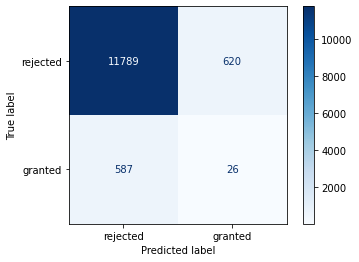

The average f1-micro average of the gnb classifier is:  0.0669636000614345
The average f1-macro average of the gnb classifier is:  0.06642078099960744
The classification report:
              precision    recall  f1-score   support

    rejected       0.93      0.02      0.04     12409
     granted       0.05      0.97      0.09       613

    accuracy                           0.07     13022
   macro avg       0.49      0.49      0.07     13022
weighted avg       0.89      0.07      0.05     13022



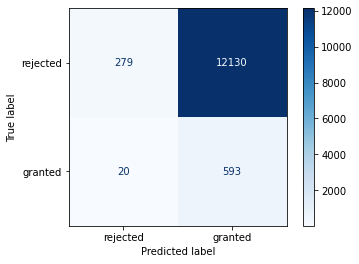

The average f1-micro average of the kNN classifier is:  0.9525418522500384
The average f1-macro average of the kNN classifier is:  0.5621754097793423
The classification report:
              precision    recall  f1-score   support

    rejected       0.96      1.00      0.98     12409
     granted       0.48      0.09      0.15       613

    accuracy                           0.95     13022
   macro avg       0.72      0.54      0.56     13022
weighted avg       0.93      0.95      0.94     13022



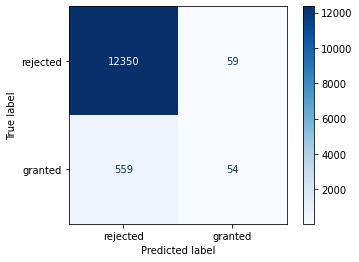

The average f1-micro average of the mlp classifier is:  0.8283673782829057
The average f1-macro average of the mlp classifier is:  0.5112925864488963
The classification report:
              precision    recall  f1-score   support

    rejected       0.96      0.86      0.90     12409
     granted       0.08      0.24      0.12       613

    accuracy                           0.83     13022
   macro avg       0.52      0.55      0.51     13022
weighted avg       0.92      0.83      0.87     13022



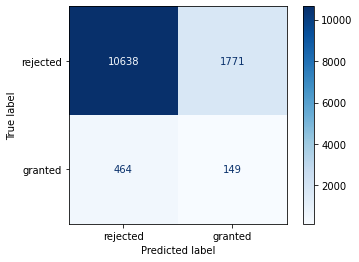

The average f1-micro average of the svc classifier is:  0.84080786361542
The average f1-macro average of the svc classifier is:  0.48687513114623315
The classification report:
              precision    recall  f1-score   support

    rejected       0.95      0.88      0.91     12409
     granted       0.04      0.11      0.06       613

    accuracy                           0.84     13022
   macro avg       0.50      0.49      0.49     13022
weighted avg       0.91      0.84      0.87     13022



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


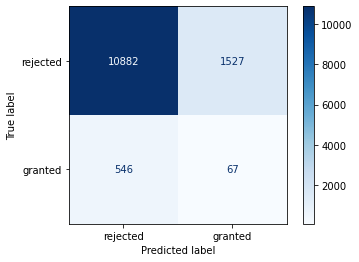

The average f1-micro average of the svm classifier is:  0.9529258178467209
The average f1-macro average of the svm classifier is:  0.4879477802681766
The classification report:
              precision    recall  f1-score   support

    rejected       0.95      1.00      0.98     12409
     granted       0.00      0.00      0.00       613

    accuracy                           0.95     13022
   macro avg       0.48      0.50      0.49     13022
weighted avg       0.91      0.95      0.93     13022



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


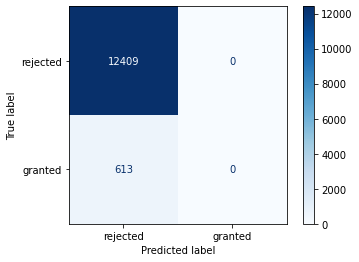

6


In [102]:
classifiers = {
    'dummy': dummy,
    'gnb': gnb,
    'kNN': knn,
    'mlp': mlp,
    'svc': linear_svc,
    'svm': svc

}

big_scores_default = runEstimators(big_train, big_test, big_train_labels, big_test_labels, 
                                  my_transformers={}, my_classifiers=classifiers, 
                                  est_values_mapper={}, cv=None, showResults=True)

####Σχολιασμός αποτελεσμάτων

Για την μελέτη των αποτελεσμάτων έχουν τυπωθεί οι τιμές f1-micro average και f1-macro average, τα classification reports και οι πίνακες σύγχυσης.
Η εξήγηση των παραπάνω έχει γίνει στην μελέτη του μικρού dataset, οπότε ακολουθεί η ερμηνεία τους.

Μελετώντας τα παραπάνω classification reports μπορούμε να βγάλουμε ορισμένα συμπεράσματα, αλλά και να καταλήξουμε αν τα αποτελέσματα από το train των classifiers με τις default τους τιμές είναι αναμενόμενο.

* Για τον **Dummy Classifier**: Έχει χρησιμοποιηθεί η deafult στρατηγική του, δηλαδή η *stratified*, η οποία ταξινομεί το κάθε δείγμα ανεξάρτητα από τα χαρακτηριστικά του, λαμβάνοντας μόνον υπόψιν να διατηρείται σταθερή η κατανομή των κλάσεων και να είναι ίδια με αυτή στα train data. Όπως ήταν αναμενόμενο, και όπως φαίνεται και από τους πίνακες σύγχυσης, ο ταξινομητής έχει ταξινομήσει στην κλάση 0 (μη πτώχευση) 12415 δείγματα, δηλαδή το 95.3% των συνολικών δειγμάτων, ακριβώς όσο ήταν και η κατανομή 0 και 1 στο training data. Ακριβώς επειδή έχουν ταξινομηθεί τα περισσότερα δείγματα στην κλάση 0 και επειδή όντως τα περισσότερα ανήκαν σε αυτήν οι τιμές των **Precision** (κατά πόσο ήταν θετικά αυτά που το μοντέλο δήλωσε ως θετικά), **Recall** (ποσοστό από τα positives για την κάθε κλάση προβλέψαμε σωστά) και **f1 score** (ποσοστό των θετικών προβλέψεων που ήταν σωστά) είναι πολύ κοντά στη μονάδα. Παρόλα αυτά το ίδια δεν ισχύει καθόλου για τις παραπάνω τιμές της κλάσης 1.

* Για τον **Gaussian Naive Bayes Classifier**: Παρατηρούμε ότι ταξινομεί τη συντριπτική πλειοψηφία των δειγμάτων στην κλάση 1.

* Για τον **k_Nearest Neighbors Classifier**, όπου η default τιμή για την υπερπαράμετρο k είναι k=5, παρατηρούμε

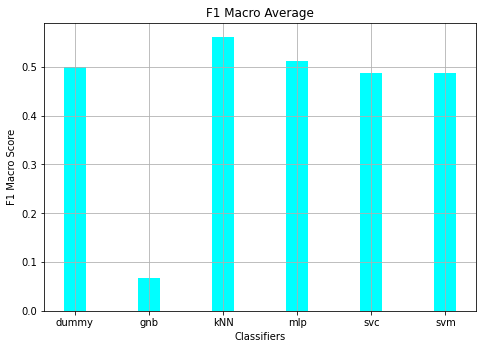

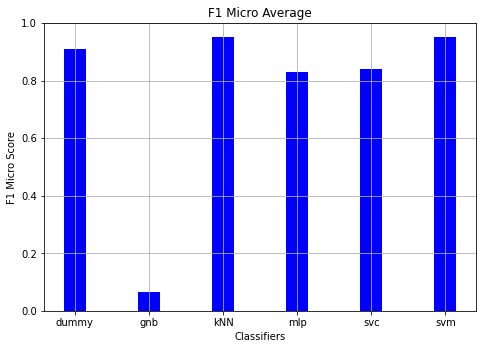

In [122]:
# plot for f1-macro average
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clfs = [label[:-1] for label in big_scores_default['preds'].keys()]
big_f1_macro = [f1_score(big_test_labels, pred, average='macro') for pred in big_scores_default['preds'].values()]
ax.bar(clfs,big_f1_macro, color='cyan', width=0.3)
plt.title("F1 Macro Average")
plt.xlabel("Classifiers")
plt.ylabel("F1 Macro Score")
plt.grid()
plt.show()


# plot for f1-micro average
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
big_f1_micro = [f1_score(big_test_labels, pred, average='micro') for pred in big_scores_default['preds'].values()]
ax.bar(clfs,big_f1_micro, color='b', width=0.3)
plt.title("F1 Micro Average")
plt.xlabel("Classifiers")
plt.ylabel("F1 Micro Score")
plt.grid()
plt.show()


##Βελτιστοποίηση ταξινομητών

Εκτελούμε τις παρακάτω εντολές για να βρούμε τη διακύμανση στις τιμές των διαφόρων χαρακτηριστικών:

In [ ]:
train_variance = big_train.var(axis=0)
print(train_variance)
print(np.max(train_variance))
print(sorted(train_variance)[:10])

0     9.849437e+00
1     4.198069e+01
2     4.160250e+01
3     9.887053e+04
4     4.965104e+09
          ...     
58    1.941728e+08
59    4.756928e+04
60    6.455085e+09
61    2.062235e+04
62    3.013573e+06
Length: 63, dtype: float64
12937558448.38118
[0.6804135345248344, 9.849436821773434, 29.00190911205414, 32.71701794330499, 33.25148082454213, 33.802391251766295, 33.80239292851975, 34.20395090859152, 35.52978806467996, 41.602499271752016]


###Μετρική απόδοσης f1-macro

####Dummy

In [ ]:
transformers = {
    'min_max_scaler': min_max_scaler,
    'selector': selector,
    'scaler': scaler,
    'ros': ros,
    'rus': rus,
    'pca': pca
}

Best dummy strategy is:   stratified  



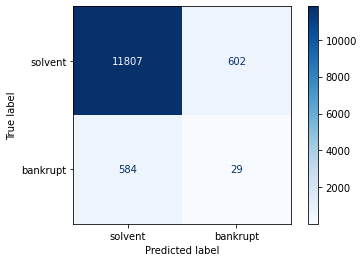

The average f1-micro average is:  0.9080786361542006
The average f1-macro average is:  0.4997206269011019
Classification report:
               precision    recall  f1-score   support

     solvent       0.95      0.95      0.95     12409
    bankrupt       0.05      0.05      0.05       613

    accuracy                           0.91     13022
   macro avg       0.50      0.50      0.50     13022
weighted avg       0.91      0.91      0.91     13022

Fit time:  0.0012788772583007812
Predict time:  0.00046944618225097656


In [272]:
findDummyStrategy(big_train, big_test, big_train_labels, big_test_labels, 'macro', 'solvent', 'bankrupt')


RESULTS
Best estimator is:  Pipeline(memory='tmp',
         steps=[('dummy', DummyClassifier(strategy='stratified'))])
steps:  {'dummy': DummyClassifier(strategy='stratified')}


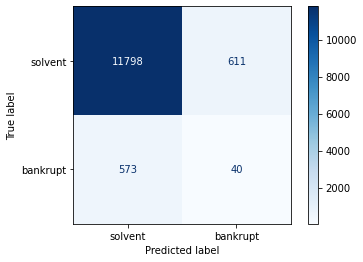

The average f1-micro average is:  0.9075410843188451
The average f1-macro average is:  0.5001908256534456
Classification report:
               precision    recall  f1-score   support

     solvent       0.95      0.95      0.95     12409
    bankrupt       0.05      0.05      0.05       613

    accuracy                           0.91     13022
   macro avg       0.50      0.50      0.50     13022
weighted avg       0.91      0.91      0.91     13022

Fit time:  2.0574147701263428
Predict time:  0.0009551048278808594


In [25]:
import operator

# compute f1-macro
dummy_macro_big = {k: f1_score(big_test_labels, v, average='macro') for k,v in big_scores_dummy['preds'].items()}
# get the estimator with the maximum f1-macro
opt_dummy_macro = max(dummy_macro_big.items(), key=operator.itemgetter(1))[0]

getResults(big_scores_dummy, opt_dummy_macro, big_test, big_test_labels, "solvent", "bankrupt")

####Gaussian Naive Bayes Classifier

In [ ]:
import operator
# dict that maps the transformer/classifier with the values of its arguments
est_values_mapper = {
    'selector': [0, 10, 35],
    'pca': [15, 20, 25],
    'dummy': ['uniform', 'constant_0', 'constant_1', 'most_frequent', 'stratified']
}

big_scores_gnb = runEstimators(big_train, big_test, big_train_labels, big_test_labels, 
                               my_transformers=transformers, my_classifiers={'gnb':gnb}, 
                               est_values_mapper=est_values_mapper, cv=5, scoring='f1_macro')


 [[], ['min_max_scaler'], ['scaler'], ['ros'], ['rus'], ['pca'], ['min_max_scaler', 'selector'], ['min_max_scaler', 'ros'], ['min_max_scaler', 'rus'], ['min_max_scaler', 'pca'], ['scaler', 'ros'], ['scaler', 'rus'], ['scaler', 'pca'], ['ros', 'pca'], ['rus', 'pca'], ['min_max_scaler', 'selector', 'ros'], ['min_max_scaler', 'selector', 'rus'], ['min_max_scaler', 'selector', 'pca'], ['min_max_scaler', 'ros', 'pca'], ['min_max_scaler', 'rus', 'pca'], ['scaler', 'ros', 'pca'], ['scaler', 'rus', 'pca'], ['min_max_scaler', 'selector', 'ros', 'pca'], ['min_max_scaler', 'selector', 'rus', 'pca']] 
[('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('min_max_scaler', MinMaxScaler()), ('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


[('scaler', StandardScaler()), ('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


[('ros', RandomOverSampler()), ('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s finished


[('rus', RandomUnderSampler()), ('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1822s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


[('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('gnb', GaussianNB())]
{'selector__threshold': [0, 10, 35]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


[('min_max_scaler', MinMaxScaler()), ('ros', RandomOverSampler()), ('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s finished


[('min_max_scaler', MinMaxScaler()), ('rus', RandomUnderSampler()), ('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


[('min_max_scaler', MinMaxScaler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


[('scaler', StandardScaler()), ('ros', RandomOverSampler()), ('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s finished


[('scaler', StandardScaler()), ('rus', RandomUnderSampler()), ('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


[('scaler', StandardScaler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


[('ros', RandomOverSampler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.9s finished


[('rus', RandomUnderSampler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('ros', RandomOverSampler()), ('gnb', GaussianNB())]
{'selector__threshold': [0, 10, 35]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.8s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('rus', RandomUnderSampler()), ('gnb', GaussianNB())]
{'selector__threshold': [0, 10, 35]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('pca', PCA()), ('gnb', GaussianNB())]
{'selector__threshold': [0, 10, 35], 'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.0s finished


[('min_max_scaler', MinMaxScaler()), ('ros', RandomOverSampler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.9s finished


[('min_max_scaler', MinMaxScaler()), ('rus', RandomUnderSampler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


[('scaler', StandardScaler()), ('ros', RandomOverSampler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.9s finished


[('scaler', StandardScaler()), ('rus', RandomUnderSampler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('ros', RandomOverSampler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'selector__threshold': [0, 10, 35], 'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.2s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('rus', RandomUnderSampler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'selector__threshold': [0, 10, 35], 'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.0s finished


24



RESULTS
Best estimator is:  Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('rus', RandomUnderSampler()),
                ('gnb', GaussianNB())])
steps:  {'scaler': StandardScaler(), 'rus': RandomUnderSampler(), 'gnb': GaussianNB()}


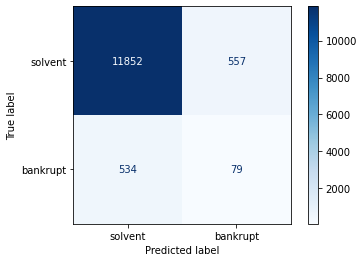

The average f1-micro average is:  0.9162187068038704
The average f1-macro average is:  0.5412501971732658
Classification report:
               precision    recall  f1-score   support

     solvent       0.96      0.96      0.96     12409
    bankrupt       0.12      0.13      0.13       613

    accuracy                           0.92     13022
   macro avg       0.54      0.54      0.54     13022
weighted avg       0.92      0.92      0.92     13022

Fit time:  0.5490913391113281
Predict time:  0.012362957000732422


In [ ]:
# compute f1-macro
gnb_macro_big = {k: f1_score(big_test_labels, v, average='macro') for k,v in big_scores_gnb['preds'].items()}
# get the estimator with the maximum f1-macro
opt_gnb_macro = max(gnb_macro_big.items(), key=operator.itemgetter(1))[0]

getResults(big_scores_gnb, opt_gnb_macro, big_test, big_test_labels, "solvent", "bankrupt")

Ο ταξινομητής Gaussian Naive Bayes δεν διαθέται κάποιες υπερπαραμέτρους προς βελτιστοποίηση. Επομένως, η μελέτη των υπερπαραμέτρων του συνολικού ταξινομητή αφορά μόνο τους μετασχηματιστές. Ύστερα, από GridSearchCV σε κάθε συνδυασμό των μετασχηματιστών την καλύτερη τιμή f1 macro average παρουσίασε η ακολουθία **StandardScaler()** και **RandomUnderSampler()**. Με αυτόν τον τρόπο έγινε κανονικοποίηση των δεδομένων και στη συνέχεια υποδειγματοληψία της κλάσης που εμφανίζεται με μεγαλύτερη συχνότητα. Η τελική τιμή της μετρικής που χρησιμοποιείται, f1 macro average έχει τιμή 0.54125.

####k_Nearest Neighbors Classifier

In [ ]:
# dict that maps the transformer/classifier with the values of its arguments
est_dict_knn = {
    'selector': [0, 10, 35],
    'pca': [15, 20, 25],
    'kNN': {
        "kNN__n_neighbors":[3, 5, 7],
        "kNN__weights": ["uniform", "distance"],
        "kNN__metric": ["euclidean", "manhattan"]
    }
}


big_scores_knn = runEstimators(big_train, big_test, big_train_labels, big_test_labels, 
                               my_transformers=transformers, my_classifiers={'kNN':knn}, 
                               est_values_mapper=est_dict_knn, cv=5, scoring='f1_macro')


 [[], ['min_max_scaler'], ['scaler'], ['ros'], ['rus'], ['pca'], ['min_max_scaler', 'selector'], ['min_max_scaler', 'ros'], ['min_max_scaler', 'rus'], ['min_max_scaler', 'pca'], ['scaler', 'ros'], ['scaler', 'rus'], ['scaler', 'pca'], ['ros', 'pca'], ['rus', 'pca'], ['min_max_scaler', 'selector', 'ros'], ['min_max_scaler', 'selector', 'rus'], ['min_max_scaler', 'selector', 'pca'], ['min_max_scaler', 'ros', 'pca'], ['min_max_scaler', 'rus', 'pca'], ['scaler', 'ros', 'pca'], ['scaler', 'rus', 'pca'], ['min_max_scaler', 'selector', 'ros', 'pca'], ['min_max_scaler', 'selector', 'rus', 'pca']] 
[('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.3min finished


[('min_max_scaler', MinMaxScaler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.4min finished


[('scaler', StandardScaler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.9min finished


[('ros', RandomOverSampler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.4min finished


[('rus', RandomUnderSampler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   32.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   32.0s finished


[('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.5min finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'selector__threshold': [0, 10, 35], 'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.4min finished


[('min_max_scaler', MinMaxScaler()), ('ros', RandomOverSampler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.9min finished


[('min_max_scaler', MinMaxScaler()), ('rus', RandomUnderSampler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   30.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   30.0s finished


[('min_max_scaler', MinMaxScaler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  2.0min finished


[('scaler', StandardScaler()), ('ros', RandomOverSampler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  7.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  7.9min finished


[('scaler', StandardScaler()), ('rus', RandomUnderSampler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   42.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   42.6s finished


[('scaler', StandardScaler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.6min finished


[('ros', RandomOverSampler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.6min finished


[('rus', RandomUnderSampler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   39.5s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('ros', RandomOverSampler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'selector__threshold': [0, 10, 35], 'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  4.6min finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('rus', RandomUnderSampler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'selector__threshold': [0, 10, 35], 'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   34.4s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'selector__threshold': [0, 10, 35], 'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1

[('min_max_scaler', MinMaxScaler()), ('ros', RandomOverSampler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  2.7min finished


[('min_max_scaler', MinMaxScaler()), ('rus', RandomUnderSampler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   30.7s finished


[('scaler', StandardScaler()), ('ros', RandomOverSampler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  4.0min finished


[('scaler', StandardScaler()), ('rus', RandomUnderSampler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   50.9s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('ros', RandomOverSampler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'selector__threshold': [0, 10, 35], 'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1

[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('rus', RandomUnderSampler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'selector__threshold': [0, 10, 35], 'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [3, 5, 7], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

24



RESULTS
Best estimator is:  Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('ros', RandomOverSampler()),
                ('kNN',
                 KNeighborsClassifier(metric='manhattan', n_jobs=-1,
                                      n_neighbors=3))])
steps:  {'scaler': StandardScaler(), 'ros': RandomOverSampler(), 'kNN': KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=3)}


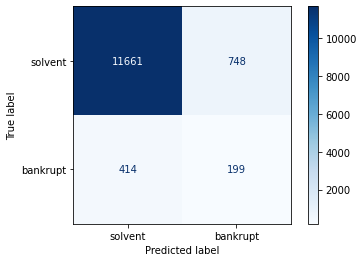

The average f1-micro average is:  0.9107663953309784
The average f1-macro average is:  0.60383431984886
Classification report:
               precision    recall  f1-score   support

     solvent       0.97      0.94      0.95     12409
    bankrupt       0.21      0.32      0.26       613

    accuracy                           0.91     13022
   macro avg       0.59      0.63      0.60     13022
weighted avg       0.93      0.91      0.92     13022

Fit time:  472.30390095710754
Predict time:  31.015074968338013


In [ ]:
import operator
# compute f1-macro
knn_macro_big = {k: f1_score(big_test_labels, v, average='macro') for k,v in big_scores_knn['preds'].items()}
# get the estimator with the maximum f1-macro
opt_knn_macro = max(knn_macro_big.items(), key=operator.itemgetter(1))[0]

getResults(big_scores_knn, opt_knn_macro, big_test, big_test_labels, "solvent", "bankrupt")

Οι υπερπαράμετροι προς βελτιστοποίηση στον εκτιμητή με τελικό ταξινομητή τον k_NN Classifier είναι το **πλήθος γειτόνων k**, η **metric** και **weights**, καθώς και όλες οι υπερπαράμετροι των μετασχηματιστών. Η βέλτιστη τιμή στην μετρική f1 macro average, η οποία ήταν **0.6038** προέκυψε από τις τιμές:


*   k = 3
*   weights = uniform
*   metric = manhattan

Oι μετασχηματιστές που χρησιμοποιήθηκαν ήταν οι **StandardScaler()** και **RandomOverSampler()** που κανονικοποιούν και υπερδειγματοληπτούν αντίστοιχα τα δεδομένα.



####Multilayer Perceptron

#####Επεξήγηση του ταξινομητή Multilayer Perceptron
Ο ταξινομητής MLP αποτελεί ένα νευρωνικό δίκτυο. Aποτελείται από 3 επίπεδα νευρώνων:
 
1.  input layer
2.  hidden layer
3.  output layer

Εκτός των κόμβων του πρώτου στρώματος κάθε κόμβος είναι ένας νευρώνας που χρησιμοποιεί μία μη γραμμική συνάρτηση ενεργοποίησης. Εφαρμόζει την τεχνική backpropagation για το training.

Οι υπερπαράμετροι προς βελτιστοποίηση είναι:

1. **hidden layer size**: Το πλήθος νευρώνων στο αντίστοιχο hidden layer.

2. **activation**: Η συνάρτηση ενεργοποίησης των νευρώνων του hidden layer

3. **solver**: Για τη βελτιστοποίηση των βαρών

4. **max iteration**: Το μέγιστο πλήθος επαναλήψεων

5. **alpha**: Ένα penalty term που περιορίζει το μέγεθος των βαρών, μειώνοντας έτσι τον κίνδυνο overfitting.

6. **learning rate**: Ελέγχει πόσο γρήγορα το μοντέλο προσαρμόζεται στο πρόβλημα.

In [ ]:
# reduced_train = big_train[:10000]
# reduced_train_labels = big_train_labels[:10000]
# reduced_test = big_test[:round(10000*big_test.shape[0]/big_train.shape[0])]
# reduced_test_labels = big_test_labels[:round(10000*big_test_labels.shape[0]/big_train_labels.shape[0])]


# print(reduced_train.shape)
# print(reduced_train_labels.shape)
# print(reduced_test.shape)
# print(reduced_test_labels.shape)


(10000, 63)
(10000,)
(4286, 63)
(4286,)


Όπως αναμέναμε, στους μέχρι τώρα ταξινομητές που έχουν προκύψει για το μεγάλο dataset, δεν έχει χρησιμοποιηθεί τεχνική μείωσης της διαστατικότητας των δεδομένων (Variance Threshold και PCA). Λαμβάνοντας, επίσης, υπόψιν ότι αριθμός των δειγμάτων είναι πολύ μεγαλύτερος αυτού των χαρακτηριστικών (30383 στο training έναντι 63), καθώς και ότι τα χαρακρητιστικά δεν εμφανίζουν μικρές διακυμάνσεις στις τιμές τους, με αποτέλεσμα να είναι όλα φαίνονμενικά χρήσιμα, <u>δεν δοκιμάζουμε πλέον σε ορισμένες περιπτώσεις να χρησιμοποιούμε *selector* και *pca* στα διάφορα gridsearchCV's</u>.

In [ ]:
est_values_mapper = {
    'mlpc': {
        'mlpc__hidden_layer_sizes': [(5, ), (10, ), (30, )],
        'mlpc__activation': ["tanh", "relu"],
        'mlpc__solver': ["lbfgs", "sgd", "adam"],
        'mlpc__max_iter': [1000, 1200, 1300],
        'mlpc__alpha': (0, 0.00001, 0.0001, 0.001),
        'mlpc__learning_rate': ["constant", "invscaling"]
    }
}

transformers = {
    'min_max_scaler': min_max_scaler,
    # 'selector': selector,
    'scaler': scaler,
    'ros': ros,
    'rus': rus,
    # 'pca': pca
}


reduced_train = big_train[:10000]
reduced_train_labels = big_train_labels[:10000]
reduced_test = big_test[:round(10000*big_test.shape[0]/big_train.shape[0])]
reduced_test_labels = big_test_labels[:round(10000*big_test_labels.shape[0]/big_train_labels.shape[0])]


big_scores_mlp = runEstimators(reduced_train, reduced_test, reduced_train_labels, reduced_test_labels, 
                                 my_transformers=transformers, my_classifiers={'mlpc':mlp}, 
                                 est_values_mapper=est_values_mapper, cv=5, scoring='f1_macro')

 [[], ['min_max_scaler'], ['scaler'], ['ros'], ['rus'], ['min_max_scaler', 'ros'], ['min_max_scaler', 'rus'], ['scaler', 'ros'], ['scaler', 'rus']] 
[('mlpc', MLPClassifier())]
{'mlpc__hidden_layer_sizes': [(5,), (10,), (30,)], 'mlpc__activation': ['tanh', 'relu'], 'mlpc__solver': ['lbfgs', 'sgd', 'adam'], 'mlpc__max_iter': [1000, 1200, 1300], 'mlpc__alpha': (0, 1e-05, 0.0001, 0.001), 'mlpc__learning_rate': ['constant', 'invscaling']}
Fitting 2 folds for each of 432 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4

[('min_max_scaler', MinMaxScaler()), ('mlpc', MLPClassifier())]
{'mlpc__hidden_layer_sizes': [(5,), (10,), (30,)], 'mlpc__activation': ['tanh', 'relu'], 'mlpc__solver': ['lbfgs', 'sgd', 'adam'], 'mlpc__max_iter': [1000, 1200, 1300], 'mlpc__alpha': (0, 1e-05, 0.0001, 0.001), 'mlpc__learning_rate': ['constant', 'invscaling']}
Fitting 2 folds for each of 432 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

[('scaler', StandardScaler()), ('mlpc', MLPClassifier())]
{'mlpc__hidden_layer_sizes': [(5,), (10,), (30,)], 'mlpc__activation': ['tanh', 'relu'], 'mlpc__solver': ['lbfgs', 'sgd', 'adam'], 'mlpc__max_iter': [1000, 1200, 1300], 'mlpc__alpha': (0, 1e-05, 0.0001, 0.001), 'mlpc__learning_rate': ['constant', 'invscaling']}
Fitting 2 folds for each of 432 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  9

[('ros', RandomOverSampler()), ('mlpc', MLPClassifier())]
{'mlpc__hidden_layer_sizes': [(5,), (10,), (30,)], 'mlpc__activation': ['tanh', 'relu'], 'mlpc__solver': ['lbfgs', 'sgd', 'adam'], 'mlpc__max_iter': [1000, 1200, 1300], 'mlpc__alpha': (0, 1e-05, 0.0001, 0.001), 'mlpc__learning_rate': ['constant', 'invscaling']}
Fitting 2 folds for each of 432 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.9min
[Paralle

[('rus', RandomUnderSampler()), ('mlpc', MLPClassifier())]
{'mlpc__hidden_layer_sizes': [(5,), (10,), (30,)], 'mlpc__activation': ['tanh', 'relu'], 'mlpc__solver': ['lbfgs', 'sgd', 'adam'], 'mlpc__max_iter': [1000, 1200, 1300], 'mlpc__alpha': (0, 1e-05, 0.0001, 0.001), 'mlpc__learning_rate': ['constant', 'invscaling']}
Fitting 2 folds for each of 432 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

[('min_max_scaler', MinMaxScaler()), ('ros', RandomOverSampler()), ('mlpc', MLPClassifier())]
{'mlpc__hidden_layer_sizes': [(5,), (10,), (30,)], 'mlpc__activation': ['tanh', 'relu'], 'mlpc__solver': ['lbfgs', 'sgd', 'adam'], 'mlpc__max_iter': [1000, 1200, 1300], 'mlpc__alpha': (0, 1e-05, 0.0001, 0.001), 'mlpc__learning_rate': ['constant', 'invscaling']}
Fitting 2 folds for each of 432 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  8

[('min_max_scaler', MinMaxScaler()), ('rus', RandomUnderSampler()), ('mlpc', MLPClassifier())]
{'mlpc__hidden_layer_sizes': [(5,), (10,), (30,)], 'mlpc__activation': ['tanh', 'relu'], 'mlpc__solver': ['lbfgs', 'sgd', 'adam'], 'mlpc__max_iter': [1000, 1200, 1300], 'mlpc__alpha': (0, 1e-05, 0.0001, 0.001), 'mlpc__learning_rate': ['constant', 'invscaling']}
Fitting 2 folds for each of 432 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

[('scaler', StandardScaler()), ('ros', RandomOverSampler()), ('mlpc', MLPClassifier())]
{'mlpc__hidden_layer_sizes': [(5,), (10,), (30,)], 'mlpc__activation': ['tanh', 'relu'], 'mlpc__solver': ['lbfgs', 'sgd', 'adam'], 'mlpc__max_iter': [1000, 1200, 1300], 'mlpc__alpha': (0, 1e-05, 0.0001, 0.001), 'mlpc__learning_rate': ['constant', 'invscaling']}
Fitting 2 folds for each of 432 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 27

[('scaler', StandardScaler()), ('rus', RandomUnderSampler()), ('mlpc', MLPClassifier())]
{'mlpc__hidden_layer_sizes': [(5,), (10,), (30,)], 'mlpc__activation': ['tanh', 'relu'], 'mlpc__solver': ['lbfgs', 'sgd', 'adam'], 'mlpc__max_iter': [1000, 1200, 1300], 'mlpc__alpha': (0, 1e-05, 0.0001, 0.001), 'mlpc__learning_rate': ['constant', 'invscaling']}
Fitting 2 folds for each of 432 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1

9


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



RESULTS
Best estimator is:  Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()),
                ('mlpc',
                 MLPClassifier(activation='tanh', alpha=0.001,
                               hidden_layer_sizes=(5,), max_iter=1300,
                               solver='lbfgs'))])
steps:  {'scaler': StandardScaler(), 'mlpc': MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(5,),
              max_iter=1300, solver='lbfgs')}


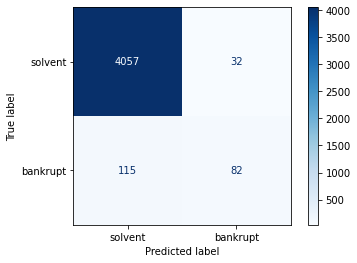

The average f1-micro average is:  0.9657022865142324
The average f1-macro average is:  0.7547683669167993
Classification report:
               precision    recall  f1-score   support

     solvent       0.97      0.99      0.98      4089
    bankrupt       0.72      0.42      0.53       197

    accuracy                           0.97      4286
   macro avg       0.85      0.70      0.75      4286
weighted avg       0.96      0.97      0.96      4286

Fit time:  3813.7757666110992
Predict time:  0.0040242671966552734


In [ ]:
import operator

# compute f1-macro
mlp_macro_big = {k: f1_score(reduced_test_labels, v, average='macro') for k,v in big_scores_mlp['preds'].items()}
# get the estimator with the maximum f1-macro
opt_mlp_macro = max(mlp_macro_big.items(), key=operator.itemgetter(1))[0]

getResults(big_scores_mlp, opt_mlp_macro, reduced_test, reduced_test_labels, "solvent", "bankrupt")

Οι τιμές των υπερπαραμέτρων που οδήγησαν στη μέγιστη τιμής της μετρικής f1 macro είναι:

* activation=tanh
* alpha=0.001
* hidden_layer_sizes=(5,)
* max_iter=1300
* solver=lbfgs

Ο μοναδικός μετασχηματιστής που χρησιμοποιήθηκε είναι ο **StandardScaler()**.

####Support vector machine

#####Linear

 [['scaler'], ['min_max_scaler'], ['rus'], ['scaler', 'rus'], ['min_max_scaler', 'rus']] 
[('scaler', StandardScaler()), ('SVC', LinearSVC())]
{'SVC__C': [1.5, 2, 2.5], 'SVC__tol': [1e-05, 0.0001, 0.001], 'SVC__loss': ['hinge', 'squared_hinge']}
Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('min_max_scaler', MinMaxScaler()), ('SVC', LinearSVC())]
{'SVC__C': [1.5, 2, 2.5], 'SVC__tol': [1e-05, 0.0001, 0.001], 'SVC__loss': ['hinge', 'squared_hinge']}
Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.4min finished


[('rus', RandomUnderSampler()), ('SVC', LinearSVC())]
{'SVC__C': [1.5, 2, 2.5], 'SVC__tol': [1e-05, 0.0001, 0.001], 'SVC__loss': ['hinge', 'squared_hinge']}
Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    9.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('scaler', StandardScaler()), ('rus', RandomUnderSampler()), ('SVC', LinearSVC())]
{'SVC__C': [1.5, 2, 2.5], 'SVC__tol': [1e-05, 0.0001, 0.001], 'SVC__loss': ['hinge', 'squared_hinge']}
Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    6.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[('min_max_scaler', MinMaxScaler()), ('rus', RandomUnderSampler()), ('SVC', LinearSVC())]
{'SVC__C': [1.5, 2, 2.5], 'SVC__tol': [1e-05, 0.0001, 0.001], 'SVC__loss': ['hinge', 'squared_hinge']}
Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    5.4s finished


5

RESULTS
Best estimator is:  Pipeline(memory='tmp',
         steps=[('rus', RandomUnderSampler()),
                ('SVC', LinearSVC(C=2, loss='hinge'))])
steps:  {'rus': RandomUnderSampler(), 'SVC': LinearSVC(C=2, loss='hinge')}


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


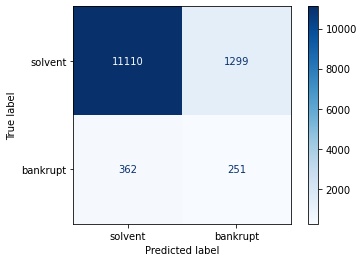

The average f1-micro average is:  0.872446628782061
The average f1-macro average is:  0.5812659328733976
Classification report:
               precision    recall  f1-score   support

     solvent       0.97      0.90      0.93     12409
    bankrupt       0.16      0.41      0.23       613

    accuracy                           0.87     13022
   macro avg       0.57      0.65      0.58     13022
weighted avg       0.93      0.87      0.90     13022

Fit time:  10.254045486450195
Predict time:  0.00157928466796875


In [78]:
est_values_mapper = {
    'SVC': {
            'SVC__C': [1.5, 2, 2.5],
            'SVC__tol': [0.00001, 0.0001, 0.001],
            'SVC__loss': ["hinge", "squared_hinge"]
            }
}

transformers = {
    'scaler': scaler,
    'min_max_scaler': min_max_scaler,
    'rus': rus,
}



big_scores_lsvc = runEstimators(big_train, big_test, big_train_labels, big_test_labels,
                                 my_transformers=transformers, my_classifiers={'SVC':linear_svc}, 
                                 est_values_mapper=est_values_mapper, cv=5, scoring='f1_macro')


# compute f1-macro
lsvc_macro_big = {k: f1_score(big_test_labels, v, average='macro') for k,v in big_scores_lsvc['preds'].items()}
# get the estimator with the maximum f1-macro
opt_lsvc_macro = max(lsvc_macro_big.items(), key=operator.itemgetter(1))[0]

getResults(big_scores_lsvc, opt_lsvc_macro, big_test, big_test_labels, "solvent", "bankrupt")

Οι τιμώς των υπερπαραμέτρων του εκτιμητή με τελικό ταξινομητή Linear SVC που οδήγησαν στη βέλτιστη τιμή της μετρικής f1 macro average είναι:

 * C = 2
 * loss = hinge
 * tol = 0.001

Ο μοναδικός μετασχηματιστής που χρησιμοποιήθηκε είναι ο **RandomUnderSampler** που αναλαμβάνει την υποδειγματοληψία των δεδομένων της κυρίαρχης κλάσης.
               

#####Non-Linear SVM

In [ ]:
est_values_mapper = {
    'selector': [0, 5, 10],
    'pca': [5, 10, 20, 30],
    'SVC': {
            'SVC__kernel': ['rbf', 'poly'],
            'SVC__C': [1, 5, 10],
            'SVC__gamma': ['scale', 'auto'],
            'SVC__tol': [1e-3, 1e-4],
            'SVC__degree': [2,3,4]
            }
}


transformers = {
    'min_max_scaler': min_max_scaler,
    'scaler': scaler,
    'ros': ros,
    'rus': rus,
}

big_scores_svc_red = runEstimators(reduced_train, reduced_test, reduced_train_labels, reduced_test_labels,
                                 my_transformers=transformers, my_classifiers={'SVC':svc}, 
                                 est_values_mapper=est_values_mapper, cv=5, scoring='f1_macro')


# compute f1-macro
svc_macro_big = {k: f1_score(reduced_test_labels, v, average='macro') for k,v in big_scores_svc_red['preds'].items()}
# get the estimator with the maximum f1-macro
opt_svc_macro_red = max(svc_macro_big.items(), key=operator.itemgetter(1))[0]

getResults(big_scores_svc_red, opt_svc_macro_red, reduced_test, reduced_test_labels, "solvent", "bankrupt")


**Σημείωση:** Στην παρούσα βελτιστοποίηση, όπως και σε μερικές ακόμη τα GridSearchCVs που οδήγησαν στον βέλτιστο ταξινομητή έτρεξαν σε διαφορετικό notebook.

Ο βέλτιστος ταξινομητής προέκυψε με χρήση των υπερπαραμέτρων:


* kernel = rbf
* degree = 3
* gamma = auto
* tol = 0.0001
* C = 1.5

Οι μετασχηματιστές που χρησιμοποιήθηκαν είναι οι:

* StandardScaler
* RandomUnderSampler

####Βέλτιστοι estimators



  Dummy  

None
steps:  {'dummy': DummyClassifier(constant=None, random_state=None, strategy='stratified')}


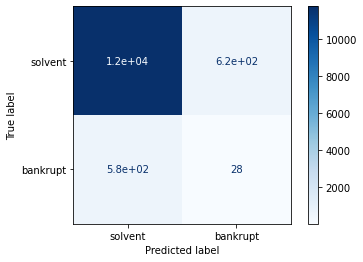

The average f1-macro average is:  0.5111244683436637
The average f1-micro average is:  0.9133005682690831
Classification report:
               precision    recall  f1-score   support

     solvent       0.95      0.96      0.95     12409
    bankrupt       0.07      0.07      0.07       613

    accuracy                           0.91     13022
   macro avg       0.51      0.51      0.51     13022
weighted avg       0.91      0.91      0.91     13022

Fit time:  0.0028879642486572266
Predict time:  0.0009694099426269531


  Gaussian Naive Bayes  

None
steps:  {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'rus': RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto'), 'gnb': GaussianNB(priors=None, var_smoothing=1e-09)}


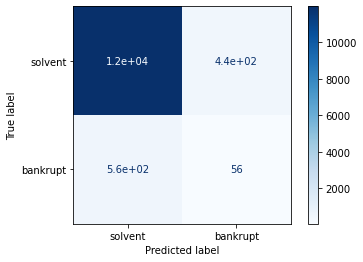

The average f1-macro average is:  0.5308369071278314
The average f1-micro average is:  0.9238212256181846
Classification report:
               precision    recall  f1-score   support

     solvent       0.96      0.96      0.96     12409
    bankrupt       0.11      0.09      0.10       613

    accuracy                           0.92     13022
   macro avg       0.53      0.53      0.53     13022
weighted avg       0.92      0.92      0.92     13022

Fit time:  0.17447781562805176
Predict time:  0.009126663208007812


  k_Nearest Neighbors  

None
steps:  {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'ros': RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto'), 'kNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='distance')}


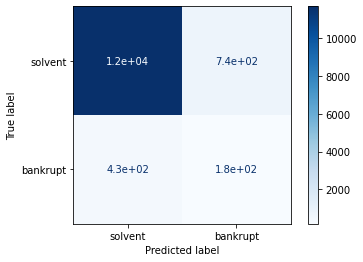

The average f1-macro average is:  0.5956674281984334
The average f1-micro average is:  0.9104592228536323
Classification report:
               precision    recall  f1-score   support

     solvent       0.96      0.94      0.95     12409
    bankrupt       0.20      0.30      0.24       613

    accuracy                           0.91     13022
   macro avg       0.58      0.62      0.60     13022
weighted avg       0.93      0.91      0.92     13022

Fit time:  0.6865761280059814
Predict time:  30.463119745254517


  Multilayer Perceptron  

None
steps:  {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'mlpc': MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5,), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=1400,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       

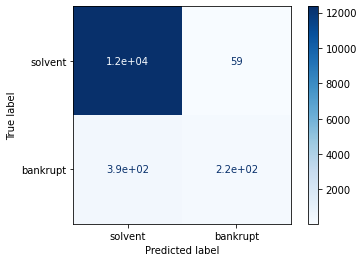

The average f1-macro average is:  0.7393758255834122
The average f1-micro average is:  0.9654430962985716
Classification report:
               precision    recall  f1-score   support

     solvent       0.97      1.00      0.98     12409
    bankrupt       0.79      0.36      0.50       613

    accuracy                           0.97     13022
   macro avg       0.88      0.68      0.74     13022
weighted avg       0.96      0.97      0.96     13022

Fit time:  26.877476930618286
Predict time:  0.00891733169555664


  Linear SVM  

None
steps:  {'rus': RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto'), 'SVC': LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)}


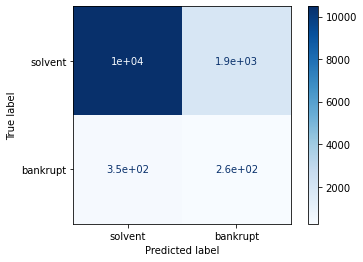

The average f1-macro average is:  0.5438713238945452
The average f1-micro average is:  0.824604515435417
Classification report:
               precision    recall  f1-score   support

     solvent       0.97      0.84      0.90     12409
    bankrupt       0.12      0.43      0.19       613

    accuracy                           0.82     13022
   macro avg       0.54      0.64      0.54     13022
weighted avg       0.93      0.82      0.87     13022

Fit time:  0.7085814476013184
Predict time:  0.0014216899871826172


  SVM  

None
steps:  {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'rus': RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto'), 'SVC': SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.0001

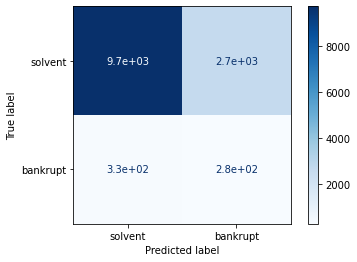

The average f1-macro average is:  0.5122155823234061
The average f1-micro average is:  0.7696974351098143
Classification report:
               precision    recall  f1-score   support

     solvent       0.97      0.79      0.87     12409
    bankrupt       0.10      0.46      0.16       613

    accuracy                           0.77     13022
   macro avg       0.53      0.62      0.51     13022
weighted avg       0.93      0.77      0.83     13022

Fit time:  1.0502333641052246
Predict time:  3.326878786087036


In [51]:
clsfs = {
    'Dummy': [('dummy', DummyClassifier(strategy='stratified'))], 
    'Gaussian Naive Bayes': [('scaler', StandardScaler()), 
                             ('rus', RandomUnderSampler()),
                             ('gnb', GaussianNB())
                            ], 
    'k_Nearest Neighbors': [('scaler', StandardScaler()), 
                            ('ros', RandomOverSampler()),
                            ('kNN', neighbors.KNeighborsClassifier(metric='manhattan', 
                                                         n_jobs=-1,
                                                         n_neighbors=3, 
                                                         weights='distance'))
                            ], 
    'Multilayer Perceptron':[('scaler', StandardScaler()),
                            ('mlpc', MLPClassifier(activation='tanh', 
                                                   alpha=0.001,
                                                   hidden_layer_sizes=(5,), 
                                                   max_iter=1400,
                                                   learning_rate='invscaling',
                                                   solver='lbfgs'))
                            ], 
    'Linear SVM': [('rus', RandomUnderSampler()), 
                   ('SVC', LinearSVC(C=2, 
                                     loss='hinge', 
                                     tol=0.0001))
                   ], 
    'SVM': [('scaler', StandardScaler()),
            ('rus', RandomUnderSampler()),
            ('SVC',SVC(kernel='rbf', 
                degree=3, 
                gamma='auto', 
                tol=0.0001,
                C=1.5))]
}



def printBestEstimators(clsfs):

    res = {}
    for classifier in clsfs:
        # create pipe
        pipe = Pipeline(steps=clsfs[classifier], memory = 'tmp')

        res[classifier] = {}
        #start counting fit time
        fit_start_time = time.time()
        # fit
        pipe.fit(big_train, big_train_labels)
        #save fit time
        res[classifier]['fit_time'] = time.time() - fit_start_time
        #start counting predict time
        predict_start_time = time.time()
        # predict over test
        res[classifier]['preds'] = pipe.predict(big_test)
        # save predict time
        res[classifier]['predict_time'] = time.time() - predict_start_time
        # plot confusion matrixes

        print("\n=========================================================================\n")
        print(print('\033[1m','\033[36m', classifier,'\033[0m','\n'))
        # best_estimator = scores['best_estimator'][opt_est]
        print("steps: ", pipe.named_steps)
        # confusion matrix
        disp = plot_confusion_matrix(pipe, big_test, big_test_labels,
                                        display_labels=["solvent", "bankrupt"],
                                        cmap=plt.cm.Blues)
        plt.show()

        # print results
        print("The average f1-macro average is: ", f1_score(big_test_labels, res[classifier]['preds'], average='macro'))
        print("The average f1-micro average is: ", f1_score(big_test_labels, res[classifier]['preds'], average='micro'))
        print("Classification report:\n", classification_report(big_test_labels, res[classifier]['preds'], target_names=["solvent", "bankrupt"]))
        print("Fit time: ", res[classifier]['fit_time'])
        print("Predict time: ", res[classifier]['predict_time'])

    return res


macro_results = printBestEstimators(clsfs)

#####Γραφήματα

                 Dummy  Gaussian Naive Bayes  k_Nearest Neighbors  \
Fit Time      0.001862              0.172272             0.651565   
Predict Time  0.000497              0.009538            29.459912   
Total Time    0.002359              0.181810            30.111477   

              Multilayer Perceptron  Linear SVM       SVM  
Fit Time                  28.009533    0.707530  1.073245  
Predict Time               0.009467    0.001468  3.307799  
Total Time                28.019000    0.708998  4.381044  


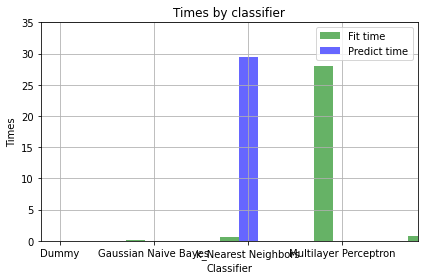

In [62]:
def printRunTimesBig(results):
    
    times = [
            [results[clf]['fit_time'] for clf in results],
             [results[clf]['predict_time'] for clf in results]
    ]

    tmp = [sum(el) for el in np.array(times).T]
    times.append(tmp)

    cols = results.keys()
    times_df = pd.DataFrame(times, columns=cols, index=['Fit Time', 'Predict Time', 'Total Time'])
    
    with pd.option_context('display.max_rows', 10, 'display.max_columns', 10):
        print(times_df)




    # graph
    n_groups = len(results)
    index = np.arange(n_groups)
    bar_width = 0.2
    opacity = 0.6

    bar1 = plt.bar(index, [results[clf]['fit_time'] for clf in results], bar_width, 
                   alpha=opacity, color='g',label='Fit time')
    
    bar2 = plt.bar(index + bar_width, [results[clf]['predict_time'] for clf in results], bar_width, 
                   alpha=opacity, color='b',label='Predict time')

    plt.xlabel('Classifier')
    plt.ylabel('Times')
    plt.title('Times by classifier')
    plt.xticks(index + bar_width, cols)
    plt.legend()
    plt.ylim(0, 35)
    plt.xlim(0, 4)
    plt.grid(True)


    plt.tight_layout()
    plt.show()


printRunTimesBig(macro_results)

Παρατηρούμε ότι ο χρόνος πρόβλεψης για το kNN και ο χρόνος εκπαίδευσης για το MLP είναι υπερβολικά μεγαλύτεροι από τους υπόλοιπους.

Αυτό είναι λογικό, καθώς στην περίπτωση του kNN το μοντέλο καλείται να συκγρίνει το κάθε δείγμα εισόδου  στο test με όλα τα δείγματα του training για να βρει τα k πιο κοντινά δείγματα.

Για την περίπτωση του mlp ο αυξημένος χρόνο στο training είναι επίσης λογικός, αφού πρόκειται για εκπαίδευση νευρωνικού δικτύου, όπου το max_iter έχει αρκετά μεγάλη τιμή.

In [66]:
def plotBarMetrics(results, default_scores):

    # print results
    opt_data = [f1_score(big_test_labels, results[clf]['preds'], average='macro') for clf in results]
    cols = ['Dummy', 'GNB', 'kNN', 'MLP', 'LinearSVC', 'SVC']
    
    progress = [default_scores,opt_data]

    progress_pd = pd.DataFrame(progress, columns=cols, index=['Default', 'Optimized'])

    print(progress_pd)

    

    # plot results
    n_groups = len(results)
    index = np.arange(n_groups)
    bar_width = 0.2
    opacity = 0.6

    default = plt.bar(index, default_scores, bar_width, 
                   alpha=opacity, color='blue',label='Default')
    
    opt = plt.bar(index + bar_width, opt_data, bar_width, 
                   alpha=opacity, color='green',label='Optimized')


    plt.xlabel('Classifier')
    plt.ylabel('F1-macro')
    plt.title('F1-macro scores')
    plt.xticks(index + bar_width, cols)
    plt.legend()
    plt.ylim(0, 1)
    plt.xlim(-0.2, 6)
    plt.grid(True)

    
    plt.tight_layout()
    plt.show()

plotBarMetrics(macro_results, big_f1_macro)

NameError: ignored

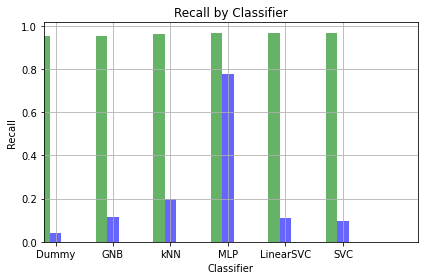

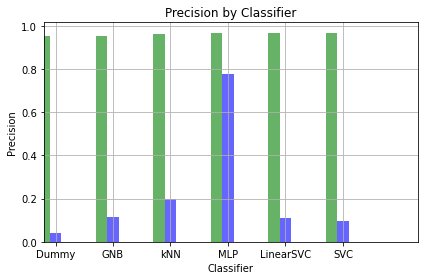

In [68]:
from sklearn.metrics import precision_recall_fscore_support
# precision, recall, fscore, sup = precision_recall_fscore_support(big_test_labels, macro_results['Multilayer Perceptron']['preds'])
# print("precision = ", precision)
# print("recall = ", recall)

bar_width = 0.2
opacity = 0.6

cols = ['Dummy', 'GNB', 'kNN', 'MLP', 'LinearSVC', 'SVC']

def plotPrecisionRecall(results):
    
    pr_rec_f_sup = {clsf: [precision_recall_fscore_support(big_test_labels, results[clsf]['preds'])] for clsf in results}

    recall = [pr_rec_f_sup[clsf][0][0] for clsf in pr_rec_f_sup]
    recall_cl0 = [el[0] for el in recall]
    recall_cl1 = [el[1] for el in recall]

    precision = [pr_rec_f_sup[clsf][0][1] for clsf in pr_rec_f_sup]
    precision_cl0 = [el[0] for el in recall]
    precision_cl1 = [el[1] for el in recall]



    n_groups = len(results)
    index = np.arange(n_groups)

    plotScores(recall_cl0, recall_cl1, cols, index, 'Recall')
    plotScores(precision_cl0, precision_cl1, cols, index, 'Precision')

def plotScores(cl0, cl1, cols, index, title):

    # plot recall

    plt.bar(index, cl0, bar_width, alpha=opacity, color='green',label='Solvent')
    plt.bar(index+bar_width, cl1, bar_width, alpha=opacity, color='blue',label='Bankrupt')
    plt.xticks(index + bar_width, cols)
    plt.xlabel('Classifier')
    plt.ylabel(title)
    t = title + ' by Classifier'
    plt.title(t)
    plt.xlim(0,6.5)


    # plot 
    # ax2.bar(index, precision_cl0, alpha=opacity, color='red',label='Solvent')
    # ax2.bar(index+bar_width, precision_cl1, alpha=opacity, color='black',label='Bankrupt')
    # ax2.xticks(cols)
    # ax2.xlabel('Classifier')
    # ax2.ylabel('Precision')
    # ax2.title('Precision by Classifier')
    # ax2.xlim(0,5)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plotPrecisionRecall(macro_results)

#####Σχολιασμός

###Μετρική απόδοσης f1-micro

####Dummy

Best dummy strategy is:   stratified  



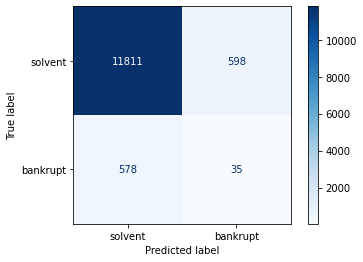

The average f1-micro average is:  0.9091537398249117
The average f1-macro average is:  0.5078015322379228
Classification report:
               precision    recall  f1-score   support

     solvent       0.95      0.95      0.95     12409
    bankrupt       0.06      0.07      0.06       613

    accuracy                           0.91     13022
   macro avg       0.51      0.51      0.51     13022
weighted avg       0.91      0.91      0.91     13022

Fit time:  0.0014977455139160156
Predict time:  0.0005505084991455078


In [273]:
findDummyStrategy(big_train, big_test, big_train_labels, big_test_labels, 'macro', 'solvent', 'bankrupt')

####Gaussian Naive Bayes Classifier

In [ ]:
transformers = {
    'min_max_scaler': min_max_scaler,
    'selector': selector,
    'scaler': scaler,
    'ros': ros,
    'rus': rus,
    'pca': pca
}

# dict that maps the transformer/classifier with the values of its arguments
est_values_mapper = {
    'selector': [0, 10, 35],
    'pca': [15, 20, 25]
}

big_scores_gnb_micro = runEstimators(big_train, big_test, big_train_labels, big_test_labels, 
                               my_transformers=transformers, my_classifiers={'gnb':gnb}, 
                               est_values_mapper=est_values_mapper, cv=5, scoring='f1_micro')

 [[], ['min_max_scaler'], ['scaler'], ['ros'], ['rus'], ['pca'], ['min_max_scaler', 'selector'], ['min_max_scaler', 'ros'], ['min_max_scaler', 'rus'], ['min_max_scaler', 'pca'], ['scaler', 'ros'], ['scaler', 'rus'], ['scaler', 'pca'], ['ros', 'pca'], ['rus', 'pca'], ['min_max_scaler', 'selector', 'ros'], ['min_max_scaler', 'selector', 'rus'], ['min_max_scaler', 'selector', 'pca'], ['min_max_scaler', 'ros', 'pca'], ['min_max_scaler', 'rus', 'pca'], ['scaler', 'ros', 'pca'], ['scaler', 'rus', 'pca'], ['min_max_scaler', 'selector', 'ros', 'pca'], ['min_max_scaler', 'selector', 'rus', 'pca']] 
[('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0945s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished


[('min_max_scaler', MinMaxScaler()), ('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


[('scaler', StandardScaler()), ('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


[('ros', RandomOverSampler()), ('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s finished


[('rus', RandomUnderSampler()), ('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


[('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1909s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('gnb', GaussianNB())]
{'selector__threshold': [0, 10, 35]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


[('min_max_scaler', MinMaxScaler()), ('ros', RandomOverSampler()), ('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s finished


[('min_max_scaler', MinMaxScaler()), ('rus', RandomUnderSampler()), ('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s finished


[('min_max_scaler', MinMaxScaler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


[('scaler', StandardScaler()), ('ros', RandomOverSampler()), ('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s finished


[('scaler', StandardScaler()), ('rus', RandomUnderSampler()), ('gnb', GaussianNB())]
{}
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


[('scaler', StandardScaler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


[('ros', RandomOverSampler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.9s finished


[('rus', RandomUnderSampler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('ros', RandomOverSampler()), ('gnb', GaussianNB())]
{'selector__threshold': [0, 10, 35]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.8s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('rus', RandomUnderSampler()), ('gnb', GaussianNB())]
{'selector__threshold': [0, 10, 35]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('pca', PCA()), ('gnb', GaussianNB())]
{'selector__threshold': [0, 10, 35], 'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.0s finished


[('min_max_scaler', MinMaxScaler()), ('ros', RandomOverSampler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.9s finished


[('min_max_scaler', MinMaxScaler()), ('rus', RandomUnderSampler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


[('scaler', StandardScaler()), ('ros', RandomOverSampler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.9s finished


[('scaler', StandardScaler()), ('rus', RandomUnderSampler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('ros', RandomOverSampler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'selector__threshold': [0, 10, 35], 'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.2s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('rus', RandomUnderSampler()), ('pca', PCA()), ('gnb', GaussianNB())]
{'selector__threshold': [0, 10, 35], 'pca__n_components': [15, 20, 25]}
Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.0s finished


24



RESULTS
Best estimator is:  Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=15)),
                ('gnb', GaussianNB())])
steps:  {'scaler': StandardScaler(), 'pca': PCA(n_components=15), 'gnb': GaussianNB()}


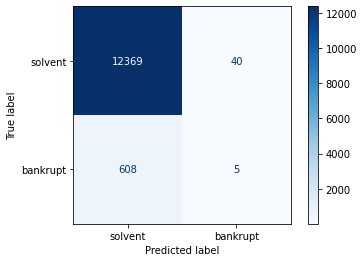

The average f1-micro average is:  0.950238058669943
The average f1-macro average is:  0.49483584399126723
Classification report:
               precision    recall  f1-score   support

     solvent       0.95      1.00      0.97     12409
    bankrupt       0.11      0.01      0.02       613

    accuracy                           0.95     13022
   macro avg       0.53      0.50      0.49     13022
weighted avg       0.91      0.95      0.93     13022

Fit time:  1.0016493797302246
Predict time:  0.012333393096923828


In [ ]:
# compute f1-micro
gnb_micro_big = {k: f1_score(big_test_labels, v, average='micro') for k,v in big_scores_gnb_micro['preds'].items()}
# get the estimator with the maximum f1-micro
opt_gnb_micro = max(gnb_micro_big.items(), key=operator.itemgetter(1))[0]

getResults(big_scores_gnb_micro, opt_gnb_micro, big_test, big_test_labels, "solvent", "bankrupt")

Η τελική τιμή της μετρικής που χρησιμοποιείται, f1 micro average έχει τιμή 0.950 και επετεύχθη χρησιμοποιώντας τους μετασχηματιστές:

* StandardScaler
* PCA(n_components=15)

####k_Nearest Neighbors Classifier

In [ ]:
# dict that maps the transformer/classifier with the values of its arguments
est_dict_knn = {
    'selector': [0, 10, 35],
    'pca': [15, 20, 25],
    'kNN': {
        "kNN__n_neighbors":[15, 17, 19],
        "kNN__weights": ["uniform", "distance"],
        "kNN__metric": ["euclidean", "manhattan"]
    }   
}

transformers = {
    'min_max_scaler': min_max_scaler,
    'scaler': scaler,
    'ros': ros,
    'rus': rus
}


big_scores_knn_micro = runEstimators(big_train, big_test, big_train_labels, big_test_labels, 
                               my_transformers=transformers, my_classifiers={'kNN':knn}, 
                               est_values_mapper=est_dict_knn, cv=5, scoring='f1_micro')

 [[], ['min_max_scaler'], ['scaler'], ['ros'], ['rus'], ['pca'], ['min_max_scaler', 'selector'], ['min_max_scaler', 'ros'], ['min_max_scaler', 'rus'], ['min_max_scaler', 'pca'], ['scaler', 'ros'], ['scaler', 'rus'], ['scaler', 'pca'], ['ros', 'pca'], ['rus', 'pca'], ['min_max_scaler', 'selector', 'ros'], ['min_max_scaler', 'selector', 'rus'], ['min_max_scaler', 'selector', 'pca'], ['min_max_scaler', 'ros', 'pca'], ['min_max_scaler', 'rus', 'pca'], ['scaler', 'ros', 'pca'], ['scaler', 'rus', 'pca'], ['min_max_scaler', 'selector', 'ros', 'pca'], ['min_max_scaler', 'selector', 'rus', 'pca']] 
[('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.6min finished


[('min_max_scaler', MinMaxScaler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.9min finished


[('scaler', StandardScaler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  6.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  6.0min finished


[('ros', RandomOverSampler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.9min finished


[('rus', RandomUnderSampler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   25.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   25.3s finished


[('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.9min finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'selector__threshold': [0, 10, 35], 'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.9min finished


[('min_max_scaler', MinMaxScaler()), ('ros', RandomOverSampler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  5.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  5.5min finished


[('min_max_scaler', MinMaxScaler()), ('rus', RandomUnderSampler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   35.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   35.1s finished


[('min_max_scaler', MinMaxScaler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  2.5min finished


[('scaler', StandardScaler()), ('ros', RandomOverSampler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  9.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  9.2min finished


[('scaler', StandardScaler()), ('rus', RandomUnderSampler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   52.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   52.6s finished


[('scaler', StandardScaler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  4.5min finished


[('ros', RandomOverSampler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  2.1min finished


[('rus', RandomUnderSampler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   44.2s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('ros', RandomOverSampler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'selector__threshold': [0, 10, 35], 'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  5.7min finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('rus', RandomUnderSampler()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'selector__threshold': [0, 10, 35], 'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   40.7s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'selector__threshold': [0, 10, 35], 'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1

[('min_max_scaler', MinMaxScaler()), ('ros', RandomOverSampler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.2min finished


[('min_max_scaler', MinMaxScaler()), ('rus', RandomUnderSampler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   37.1s finished


[('scaler', StandardScaler()), ('ros', RandomOverSampler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  5.3min finished


[('scaler', StandardScaler()), ('rus', RandomUnderSampler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   58.9s finished


[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('ros', RandomOverSampler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'selector__threshold': [0, 10, 35], 'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

[('min_max_scaler', MinMaxScaler()), ('selector', VarianceThreshold()), ('rus', RandomUnderSampler()), ('pca', PCA()), ('kNN', KNeighborsClassifier(n_jobs=-1))]
{'selector__threshold': [0, 10, 35], 'pca__n_components': [15, 20, 25], 'kNN__n_neighbors': [15, 17, 19], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['euclidean', 'manhattan']}
Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

24



RESULTS
Best estimator is:  Pipeline(memory='tmp',
         steps=[('kNN',
                 KNeighborsClassifier(metric='manhattan', n_jobs=-1,
                                      n_neighbors=15))])
steps:  {'kNN': KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=15)}


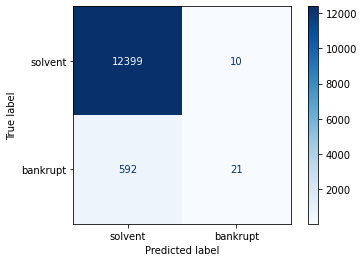

The average f1-micro average is:  0.9537705421594225
The average f1-macro average is:  0.5207583019513865
Classification report:
               precision    recall  f1-score   support

     solvent       0.95      1.00      0.98     12409
    bankrupt       0.68      0.03      0.07       613

    accuracy                           0.95     13022
   macro avg       0.82      0.52      0.52     13022
weighted avg       0.94      0.95      0.93     13022

Fit time:  97.08761787414551
Predict time:  5.517593860626221


In [ ]:
import operator
# compute f1-micro
knn_micro_big = {k: f1_score(big_test_labels, v, average='micro') for k,v in big_scores_knn_micro['preds'].items()}
# get the estimator with the maximum f1-micro
opt_knn_micro = max(knn_micro_big.items(), key=operator.itemgetter(1))[0]

getResults(big_scores_knn_micro, opt_knn_micro, big_test, big_test_labels, "solvent", "bankrupt")

Οι υπερπαράμετροι προς βελτιστοποίηση στον εκτιμητή με τελικό ταξινομητή τον k_NN Classifier είναι το πλήθος γειτόνων k, η metric και weights, καθώς και όλες οι υπερπαράμετροι των μετασχηματιστών. Η βέλτιστη τιμή στην μετρική f1 micro average, η οποία ήταν 0.9537 προέκυψε από τις τιμές:

* k = **15**
* weights = **uniform**
* metric = **manhattan**

####Multilayer Perceptron

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    9.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    9.2s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    9.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    9.3s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    8.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    8.0s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    7.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    7.0s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   12.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   12.8s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    8.2s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   13.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   13.8s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   20.9s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   28.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   28.4s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   14.2s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   21.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   21.7s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   17.3s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   22.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   22.7s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   18.3s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   27.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   27.8s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   21.9s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   28.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   28.0s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   32.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   32.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   33.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   33.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   33.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   33.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.6s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.7s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   16.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   16.3s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   13.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   13.5s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.1s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:  1.1min remaining:   32.9s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:  1.1min remaining:   32.6s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:  1.1min remaining:   32.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    6.9s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    8.7s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    9.8s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   12.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   12.4s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   10.9s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   13.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   13.1s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   23.7s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   37.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   37.5s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    2.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.1s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   57.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   57.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.4min finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.9s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:  1.9min remaining:   57.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  2.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    6.3s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    9.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    9.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:  2.5min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.3min finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    2.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.7s finished


36

RESULTS
Best estimator is:  Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=10)),
                ('scaler', StandardScaler()), ('mlpc', MLPClassifier())])


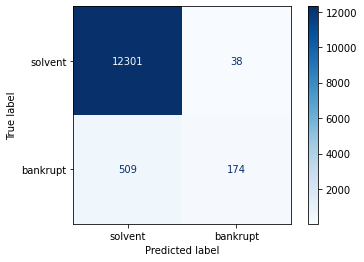

The average f1-micro average is:  0.6835382239172965
The average f1-macro average is:  0.9579941637229304
Classification report:
               precision    recall  f1-score   support

     solvent       0.96      1.00      0.98     12339
    bankrupt       0.82      0.25      0.39       683

    accuracy                           0.96     13022
   macro avg       0.89      0.63      0.68     13022
weighted avg       0.95      0.96      0.95     13022

Fit time:  150.84614300727844
Predict time:  0.02877640724182129


In [ ]:
est_values_mapper = {
    'selector': [0, 5, 10],
    'pca': [5, 10, 20, 30],
    'mlpc': {
        'hidden_layer_sizes': [(5, ), (10, ), (15, )],
        'activation': ["tanh", "relu"],
        'solver': ["lbfgs", "sgd"],
        'max_iter': [40, 80, 120],
        'alpha': [0.00001, 0.0001, 0.001],
        'learning_rate': ["constant", "invscaling"]
    }
}
transformers = {
    'selector': selector,
    'scaler': scaler,
    'min_max_scaler': min_max_scaler,
    'ros': ros,
    'rus': rus,
    'pca': pca
}


big_scores_mlp_micro = runEstimators(big_train, big_test, big_train_labels, big_test_labels, 
                                 my_transformers=transformers, my_classifiers={'mlpc':mlp}, 
                                 est_values_mapper=est_values_mapper, cv=5, scoring='f1_micro')



# compute f1-micro
mlp_micro_big = {k: f1_score(big_test_labels, v, average='micro') for k,v in big_scores_mlp_micro['preds'].items()}
# get the estimator with the maximum f1-micro
opt_mlp_micro = max(mlp_micro_big.items(), key=operator.itemgetter(1))[0]

getResults(big_scores_mlp_micro, opt_mlp_micro, big_test, big_test_labels, "solvent", "bankrupt")

Οι τιμές των υπερπαραμέτρων που οδήγησαν στη μέγιστη τιμής της μετρικής f1 micr, 0.9579, είναι:

* activation = **tanh**

* alpha = **0.00001**

* hidden_layer_sizes = **(10,)**
* max_iter = **1200**

* learning_rate = **invscaling**
* solver = **lbfgs**

O μεταχηματιστής που χρησιμοποιήθηκε είναι ο  **StandardScaler**.

####Support vector machine

#####Linear

 [[], ['scaler'], ['min_max_scaler'], ['rus'], ['ros'], ['scaler', 'rus'], ['scaler', 'ros'], ['min_max_scaler', 'rus'], ['min_max_scaler', 'ros']] 
[('SVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]
{'SVC__C': [0.2, 0.5, 1], 'SVC__tol': [1, 2, 3], 'SVC__loss': ['hinge', 'squared_hinge']}
Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.6min finished


[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]
{'SVC__C': [0.2, 0.5, 1], 'SVC__tol': [1, 2, 3], 'SVC__loss': ['hinge', 'squared_hinge']}
Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   57.9s finished


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('SVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]
{'SVC__C': [0.2, 0.5, 1], 'SVC__tol': [1, 2, 3], 'SVC__loss': ['hinge', 'squared_hinge']}
Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    4.3s finished


[('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('SVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]
{'SVC__C': [0.2, 0.5, 1], 'SVC__tol': [1, 2, 3], 'SVC__loss': ['hinge', 'squared_hinge']}
Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   10.1s finished


[('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('SVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]
{'SVC__C': [0.2, 0.5, 1], 'SVC__tol': [1, 2, 3], 'SVC__loss': ['hinge', 'squared_hinge']}
Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  4.7min finished


[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('SVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]
{'SVC__C': [0.2, 0.5, 1], 'SVC__tol': [1, 2, 3], 'SVC__loss': ['hinge', 'squared_hinge']}
Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    3.8s finished


[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('SVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]
{'SVC__C': [0.2, 0.5, 1], 'SVC__tol': [1, 2, 3], 'SVC__loss': ['hinge', 'squared_hinge']}
Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  3.4min finished


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('rus', RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')), ('SVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]
{'SVC__C': [0.2, 0.5, 1], 'SVC__tol': [1, 2, 3], 'SVC__loss': ['hinge', 'squared_hinge']}
Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    3.3s finished


[('min_max_scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('ros', RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')), ('SVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]
{'SVC__C': [0.2, 0.5, 1], 'SVC__tol': [1, 2, 3], 'SVC__loss': ['hinge', 'squared_hinge']}
Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    9.0s finished


9

RESULTS
Best estimator is:  Pipeline(memory='tmp',
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVC',
                 LinearSVC(C=0.2, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=1,
                           verbose=0))],
         verbose=False)
steps:  {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'SVC': LinearSVC(C=0.2, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=1, verbose=0)}


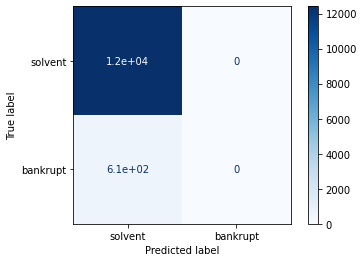

The average f1-micro average is:  0.9529258178467209
The average f1-macro average is:  0.4879477802681766
Classification report:
               precision    recall  f1-score   support

     solvent       0.95      1.00      0.98     12409
    bankrupt       0.00      0.00      0.00       613

    accuracy                           0.95     13022
   macro avg       0.48      0.50      0.49     13022
weighted avg       0.91      0.95      0.93     13022

Fit time:  66.47980165481567
Predict time:  0.004824638366699219


In [43]:
est_values_mapper = {
    'SVC': {
            'SVC__C': [0.2, 0.5, 1],
            'SVC__tol': [1, 2, 3],
            'SVC__loss': ["hinge", "squared_hinge"]
            }
}

transformers = {
    'scaler': scaler,
    'min_max_scaler': min_max_scaler,
    'rus': rus,
    'ros': ros,
}



big_scores_lsvc_micro = runEstimators(big_train, big_test, big_train_labels, big_test_labels,
                                 my_transformers=transformers, my_classifiers={'SVC':linear_svc}, 
                                 est_values_mapper=est_values_mapper, cv=5, scoring='f1_micro')


# compute f1-micro
lsvc_micro_big = {k: f1_score(big_test_labels, v, average='micro') for k,v in big_scores_lsvc_micro['preds'].items()}
# get the estimator with the maximum f1-micro
opt_lsvc_micro_red = max(lsvc_micro_big.items(), key=operator.itemgetter(1))[0]

getResults(big_scores_lsvc_micro, opt_lsvc_micro_red, big_test, big_test_labels, "solvent", "bankrupt")


RESULTS
Best estimator is:  Pipeline(memory='tmp',
         steps=[('min_max_scaler', MinMaxScaler()),
                ('SVC', LinearSVC(C=1, loss='hinge', tol=1))])
steps:  {'min_max_scaler': MinMaxScaler(), 'SVC': LinearSVC(C=1, loss='hinge', tol=1)}


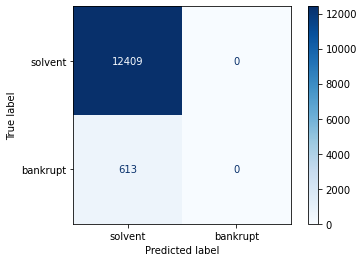

The average f1-micro average is:  0.9529258178467209
The average f1-macro average is:  0.4879477802681766
Classification report:
               precision    recall  f1-score   support

     solvent       0.95      1.00      0.98     12409
    bankrupt       0.00      0.00      0.00       613

    accuracy                           0.95     13022
   macro avg       0.48      0.50      0.49     13022
weighted avg       0.91      0.95      0.93     13022

Fit time:  42.501136779785156
Predict time:  0.004624128341674805


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#####Non-Linear SVM

In [ ]:
reduced_train = big_train[:10000]
reduced_train_labels = big_train_labels[:10000]
reduced_test = big_test[:round(10000*big_test.shape[0]/big_train.shape[0])]
reduced_test_labels = big_test_labels[:round(10000*big_test_labels.shape[0]/big_train_labels.shape[0])]



est_values_mapper = {
    'SVC': {
            'SVC__kernel': ['rbf', 'poly'],
            'SVC__C': [1, 5, 10],
            'SVC__gamma': ['scale', 'auto'],
            'SVC__tol': [1e-3, 1e-4],
            # 'SVC__loss': ["hinge", "squared_hinge"],
            'SVC__degree': [2,3,4]
            }
}


transformers = {
    'min_max_scaler': min_max_scaler,
    'scaler': scaler,
    'ros': ros,
    'rus': rus,
}

big_scores_svc_red_micro = runEstimators(reduced_train, reduced_test, reduced_train_labels, reduced_test_labels,
                                 my_transformers=transformers, my_classifiers={'SVC':svc}, 
                                 est_values_mapper=est_values_mapper, cv=5, scoring='f1_micro')


# compute f1-macro
svc_micro_big = {k: f1_score(reduced_test_labels, v, average='micro') for k,v in big_scores_svc_red_micro['preds'].items()}
# get the estimator with the maximum f1-macro
opt_svc_micro_red = max(svc_micro_big.items(), key=operator.itemgetter(1))[0]

getResults(big_scores_svc_red_micro, opt_svc_micro_red, reduced_test, reduced_test_labels, "solvent", "bankrupt")


Σημείωση: Στην παρούσα βελτιστοποίηση, όπως και σε μερικές ακόμη τα GridSearchCVs που οδήγησαν στον βέλτιστο ταξινομητή έτρεξαν σε διαφορετικό notebook.

Ο βέλτιστος ταξινομητής προέκυψε με χρήση των υπερπαραμέτρων:

* kernel = **poly**
* degree = **3**
* gamma = **scale**
* tol = **0.0001**
* C = **1**

Οι μετασχηματιστές που χρησιμοποιήθηκαν είναι οι:
**RandomUnderSampler**

####Βέλτιστοι ταξινομητές



  Dummy  

None
steps:  {'dummy': DummyClassifier(constant=None, random_state=None, strategy='most_frequent')}


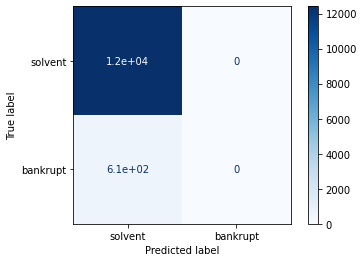

The average f1-macro average is:  0.4879477802681766
The average f1-micro average is:  0.9529258178467209
Classification report:
               precision    recall  f1-score   support

     solvent       0.95      1.00      0.98     12409
    bankrupt       0.00      0.00      0.00       613

    accuracy                           0.95     13022
   macro avg       0.48      0.50      0.49     13022
weighted avg       0.91      0.95      0.93     13022

Fit time:  0.0016243457794189453
Predict time:  0.0001404285430908203


  Gaussian Naive Bayes  

None
steps:  {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'pca': PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'gnb': GaussianNB(priors=None, var_smoothing=1e-09)}


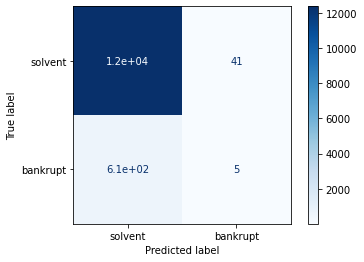

The average f1-macro average is:  0.4948041137648648
The average f1-micro average is:  0.9501612655506066
Classification report:
               precision    recall  f1-score   support

     solvent       0.95      1.00      0.97     12409
    bankrupt       0.11      0.01      0.02       613

    accuracy                           0.95     13022
   macro avg       0.53      0.50      0.49     13022
weighted avg       0.91      0.95      0.93     13022

Fit time:  0.3867216110229492
Predict time:  0.01178121566772461


  k_Nearest Neighbors  

None
steps:  {'kNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                     weights='uniform')}


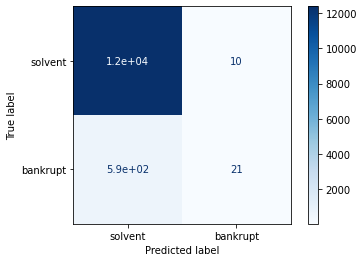

The average f1-macro average is:  0.5207583019513865
The average f1-micro average is:  0.9537705421594225
Classification report:
               precision    recall  f1-score   support

     solvent       0.95      1.00      0.98     12409
    bankrupt       0.68      0.03      0.07       613

    accuracy                           0.95     13022
   macro avg       0.82      0.52      0.52     13022
weighted avg       0.94      0.95      0.93     13022

Fit time:  0.2189779281616211
Predict time:  4.882738351821899


  Multilayer Perceptron  

None
steps:  {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'mlpc': MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=1200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       

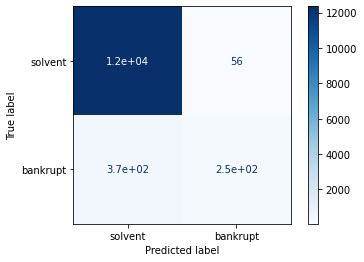

The average f1-macro average is:  0.7604358885201541
The average f1-micro average is:  0.9675165105206573
Classification report:
               precision    recall  f1-score   support

     solvent       0.97      1.00      0.98     12409
    bankrupt       0.81      0.40      0.54       613

    accuracy                           0.97     13022
   macro avg       0.89      0.70      0.76     13022
weighted avg       0.96      0.97      0.96     13022

Fit time:  34.45583748817444
Predict time:  0.011345624923706055


  Linear SVM  

None
steps:  {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'SVC': LinearSVC(C=0.2, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=1, verbose=0)}


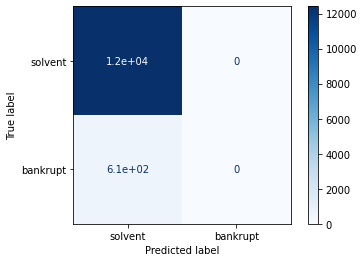

The average f1-macro average is:  0.4879477802681766
The average f1-micro average is:  0.9529258178467209
Classification report:
               precision    recall  f1-score   support

     solvent       0.95      1.00      0.98     12409
    bankrupt       0.00      0.00      0.00       613

    accuracy                           0.95     13022
   macro avg       0.48      0.50      0.49     13022
weighted avg       0.91      0.95      0.93     13022

Fit time:  7.028713226318359
Predict time:  0.0044097900390625


  SVM  

None
steps:  {'rus': RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto'), 'SVC': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)}


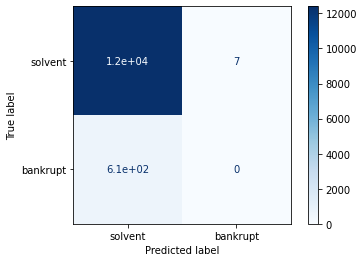

The average f1-macro average is:  0.4878067967275016
The average f1-micro average is:  0.9523882660113654
Classification report:
               precision    recall  f1-score   support

     solvent       0.95      1.00      0.98     12409
    bankrupt       0.00      0.00      0.00       613

    accuracy                           0.95     13022
   macro avg       0.48      0.50      0.49     13022
weighted avg       0.91      0.95      0.93     13022

Fit time:  0.9263143539428711
Predict time:  2.3478477001190186


  Dummy  

steps:  {'dummy': DummyClassifier(constant=None, random_state=None, strategy='stratified')}


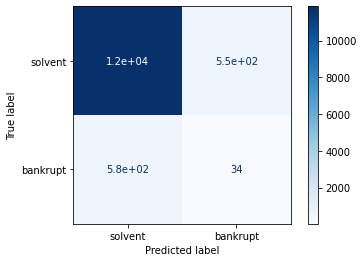

The average f1-macro average is:  0.49782809083523366
The average f1-micro average is:  0.9088465673475656
Classification report:
               precision    recall  f1-score   support

     solvent       0.95      0.95      0.95     12409
    bankrupt       0.04      0.04      0.04       613

    accuracy                           0.91     13022
   macro avg       0.50      0.50      0.50     13022
weighted avg       0.91      0.91      0.91     13022

Fit time:  0.0018622875213623047
Predict time:  0.0004966259002685547


  Gaussian Naive Bayes  

steps:  {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'rus': RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto'), 'gnb': GaussianNB(priors=None, var_smoothing=1e-09)}


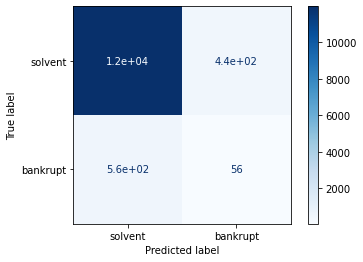

The average f1-macro average is:  0.5308369071278314
The average f1-micro average is:  0.9238212256181846
Classification report:
               precision    recall  f1-score   support

     solvent       0.96      0.96      0.96     12409
    bankrupt       0.11      0.09      0.10       613

    accuracy                           0.92     13022
   macro avg       0.53      0.53      0.53     13022
weighted avg       0.92      0.92      0.92     13022

Fit time:  0.1722719669342041
Predict time:  0.00953817367553711


  k_Nearest Neighbors  

steps:  {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'ros': RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto'), 'kNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='distance')}


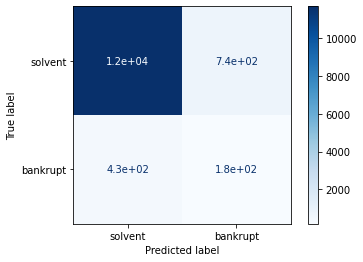

The average f1-macro average is:  0.5956674281984334
The average f1-micro average is:  0.9104592228536323
Classification report:
               precision    recall  f1-score   support

     solvent       0.96      0.94      0.95     12409
    bankrupt       0.20      0.30      0.24       613

    accuracy                           0.91     13022
   macro avg       0.58      0.62      0.60     13022
weighted avg       0.93      0.91      0.92     13022

Fit time:  0.6515650749206543
Predict time:  29.459912061691284


  Multilayer Perceptron  

steps:  {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'mlpc': MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5,), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=1400,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
            

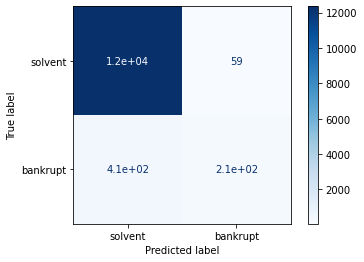

The average f1-macro average is:  0.7262558580942571
The average f1-micro average is:  0.964291199508524
Classification report:
               precision    recall  f1-score   support

     solvent       0.97      1.00      0.98     12409
    bankrupt       0.78      0.34      0.47       613

    accuracy                           0.96     13022
   macro avg       0.87      0.67      0.73     13022
weighted avg       0.96      0.96      0.96     13022

Fit time:  28.009532928466797
Predict time:  0.009466886520385742


  Linear SVM  

steps:  {'rus': RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto'), 'SVC': LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)}


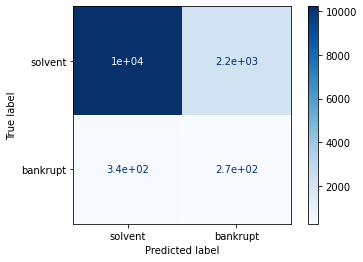

The average f1-macro average is:  0.5324630113141863
The average f1-micro average is:  0.8058669943173091
Classification report:
               precision    recall  f1-score   support

     solvent       0.97      0.82      0.89     12409
    bankrupt       0.11      0.44      0.17       613

    accuracy                           0.81     13022
   macro avg       0.54      0.63      0.53     13022
weighted avg       0.93      0.81      0.86     13022

Fit time:  0.7075297832489014
Predict time:  0.0014679431915283203


  SVM  

steps:  {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'rus': RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto'), 'SVC': SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.0001, ve

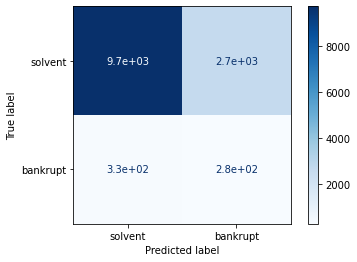

The average f1-macro average is:  0.5122155823234061
The average f1-micro average is:  0.7696974351098143
Classification report:
               precision    recall  f1-score   support

     solvent       0.97      0.79      0.87     12409
    bankrupt       0.10      0.46      0.16       613

    accuracy                           0.77     13022
   macro avg       0.53      0.62      0.51     13022
weighted avg       0.93      0.77      0.83     13022

Fit time:  1.073244571685791
Predict time:  3.3077991008758545


In [59]:
clsfs_micro = {
    'Dummy': [('dummy', DummyClassifier(strategy='most_frequent'))], 

    'Gaussian Naive Bayes': [('scaler', StandardScaler()), 
                             ('pca', PCA(n_components=15)),
                             ('gnb', GaussianNB())], 
               
    'k_Nearest Neighbors': [('kNN',neighbors.KNeighborsClassifier(metric='manhattan', 
                                                        n_jobs=-1,
                                                        n_neighbors=15,
                                                        weights='uniform'))
                            ], 
               
    'Multilayer Perceptron':[('scaler', StandardScaler()),
                            ('mlpc', MLPClassifier(activation='tanh', 
                                                   alpha=0.00001,
                                                   hidden_layer_sizes=(10,), 
                                                   max_iter=1200,
                                                   learning_rate='invscaling',
                                                   solver='lbfgs'))
                            ], 
    'Linear SVM': [('scaler',StandardScaler()),
                    ('SVC',LinearSVC(C=0.2, 
                                     loss='hinge', 
                                     max_iter=1000, 
                                     tol=1))]
               , 
    
    
    'SVM': [('rus', RandomUnderSampler()),
            ('SVC',SVC(kernel='poly', 
                degree=3, 
                gamma='scale', 
                tol=0.0001,
                C=1))]
}


micro_results = printBestEstimators(clsfs_micro)

for classifier in clsfs:
    # create pipe
    pipe = Pipeline(steps=clsfs[classifier], memory = 'tmp')

    macro_results[classifier] = {}
    #start counting fit time
    fit_start_time = time.time()
    # fit
    pipe.fit(big_train, big_train_labels)
    #save fit time
    macro_results[classifier]['fit_time'] = time.time() - fit_start_time
    #start counting predict time
    predict_start_time = time.time()
    # predict over test
    macro_results[classifier]['preds'] = pipe.predict(big_test)
    # save predict time
    macro_results[classifier]['predict_time'] = time.time() - predict_start_time
    # plot confusion matrixes

    print("\n=========================================================================\n")
    print('\033[1m','\033[36m', classifier,'\033[0m','\n')
    # best_estimator = scores['best_estimator'][opt_est]
    print("steps: ", pipe.named_steps)
    # confusion matrix
    disp = plot_confusion_matrix(pipe, big_test, big_test_labels,
                                    display_labels=["solvent", "bankrupt"],
                                    cmap=plt.cm.Blues)
    plt.show()

    # print results
    print("The average f1-macro average is: ", f1_score(big_test_labels, macro_results[classifier]['preds'], average='macro'))
    print("The average f1-micro average is: ", f1_score(big_test_labels, macro_results[classifier]['preds'], average='micro'))
    print("Classification report:\n", classification_report(big_test_labels, macro_results[classifier]['preds'], target_names=["solvent", "bankrupt"]))
    print("Fit time: ", macro_results[classifier]['fit_time'])
    print("Predict time: ", macro_results[classifier]['predict_time'])

#####Γραφήματα

                 Dummy  Gaussian Naive Bayes  k_Nearest Neighbors  \
Fit Time      0.001624              0.386722             0.218978   
Predict Time  0.000140              0.011781             4.882738   
Total Time    0.001765              0.398503             5.101716   

              Multilayer Perceptron  Linear SVM       SVM  
Fit Time                  34.455837    7.028713  0.926314  
Predict Time               0.011346    0.004410  2.347848  
Total Time                34.467183    7.033123  3.274162  


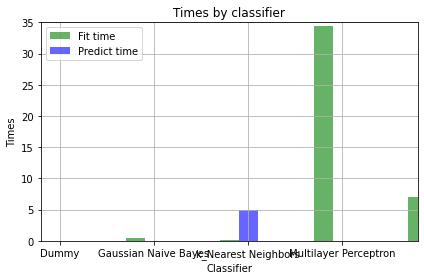

In [64]:
printRunTimesBig(micro_results)

In [65]:
plotBarMetrics(micro_results, big_f1_micro)

NameError: ignored

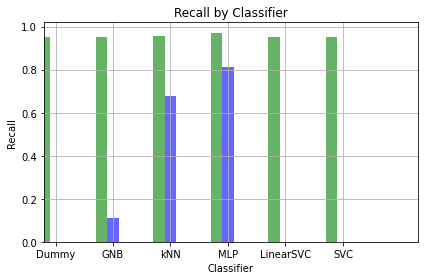

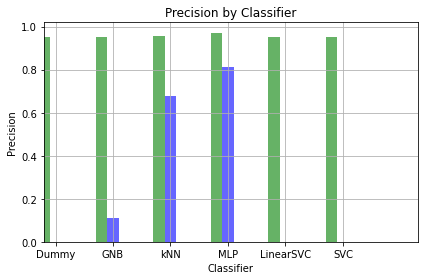

In [69]:
plotPrecisionRecall(micro_results)

#####Σχολιασμός

Συνολικά παρατηρούμε ότι το f1 average macro έχει σταθερά πολύ χαμηλότερες τιμές από το f1 average micro. Αυτό οφείλεται στο γεγονός ότι είναι υπερβολικά ανισόρροπο το dataset (95-5). 

H μετρική f1 average micro είναι λογικό να έχει μεγαλύτερες τιμές, καθώς δίνει έμφαση στις πιο συχνές κλάσεις, δεδομένου ότι δίνει σε κάθε δείγμα την ίδια βαρύτητα.

Αντίθετα, η f1 average macro δίνει την ίδια βαρύτητα σε κάθε *κλάση*, υπολογίζοντας τον μέσο όρο του f1 κάθε κλάσης. Επομένως, η κλάση "Bankrupt" ρίχνει κατά πολύ αυτή την μετρική.